In [12]:
# steps: https://github.com/lk-chen/detectron2-ResNeSt/blob/resnest/INSTALL.md

!sudo pip3 install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.5.0+cu101 True
gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516
Copyright (C) 2016 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [8]:
!(cd detectron2-ResNeSt && python3 -m pip install -e .)

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/lk_chen93/cs231n_project/detectron2-ResNeSt
     |████████████████████████████████| 12.4 MB 9.4 MB/s eta 0:00:01    |███████                         | 2.7 MB 9.4 MB/s eta 0:00:02     |██████████████████████████▏     | 10.2 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 3.0 MB 30.3 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 35.0 MB/s eta 0:00:01
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
     |████████████████████████████████| 88 kB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 26.7 MB/s eta 0:00:01
  Using cached setuptools-46.4.0-py3-none-any.whl (583 kB)
     |████████████████████████████████| 88 kB 9.0 MB/s  eta 0:00:01
  Using cached requests-2.23.0-py2.py3-none-any.whl (58

In [15]:
# To be backward compatible, try_zhanghang_detectron2 always use resnest-50
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-50/g' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2.sh
!bash try_zhanghang_detectron2.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_50.pth
!cp eval_kitti/build/results/exp1 eval_kitti/build/results/resnest_50_iter_10k -r

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-50.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=[], resume=False)
[05/22 04:27:15 detectron2:104]: Rank of current process: 0. World size: 1
[05/22 04:27:17 detectron2:105]: Environment info:
------------------------  ---------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.3 (default, May 18 2020, 08:41:38) [GCC 6.3.0 20170516]
numpy                     1.18.4
detectron2                0.1.1 @/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 6.3
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0+cu101 @/home/lk_chen93/.local/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available            True
GPU 0                    

[05/22 04:27:21 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
   

[05/22 04:27:29 d2.data.build:63]: Removed 0 images with no usable annotations. 5415 images left.
[05/22 04:27:29 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20609        |    van     | 0            |   truck    | 0            |
|  pedestrian   | 0            |   person   | 2477         |  cyclist   | 1042         |
|     tram      | 0            |    misc    | 0            |  dontcare  | 0            |
| person_sitt.. | 0            |            |              |            |              |
|     total     | 24128        |            |              |            |              |
[05/22 04:27:29 d2.data.common:88]: Serializing 5415 elements to byte tensors and concatenating them all ...
[05/22 04:27:29 d2.data.common:95]: Serialized dataset takes 2.84 MiB
[05/22 04:27:

[05/22 04:29:53 d2.evaluation.evaluator:197]: Inference done 496/2064. 0.0487 s / img. ETA=0:01:21
[05/22 04:29:58 d2.evaluation.evaluator:197]: Inference done 595/2064. 0.0485 s / img. ETA=0:01:15
[05/22 04:30:03 d2.evaluation.evaluator:197]: Inference done 693/2064. 0.0485 s / img. ETA=0:01:10
[05/22 04:30:08 d2.evaluation.evaluator:197]: Inference done 791/2064. 0.0484 s / img. ETA=0:01:05
[05/22 04:30:13 d2.evaluation.evaluator:197]: Inference done 885/2064. 0.0487 s / img. ETA=0:01:01
[05/22 04:30:18 d2.evaluation.evaluator:197]: Inference done 981/2064. 0.0487 s / img. ETA=0:00:56
[05/22 04:30:23 d2.evaluation.evaluator:197]: Inference done 1082/2064. 0.0486 s / img. ETA=0:00:50
[05/22 04:30:28 d2.evaluation.evaluator:197]: Inference done 1182/2064. 0.0484 s / img. ETA=0:00:45
[05/22 04:30:33 d2.evaluation.evaluator:197]: Inference done 1281/2064. 0.0484 s / img. ETA=0:00:40
[05/22 04:30:38 d2.evaluation.evaluator:197]: Inference done 1378/2064. 0.0484 s / img. ETA=0:00:35
[05/22

[05/22 04:33:42 d2.utils.events:215]:  eta: 0:43:17  iter: 299  total_loss: 0.775  loss_cls: 0.240  loss_box_reg: 0.450  loss_rpn_cls: 0.082  loss_rpn_loc: 0.036  validation_loss: 1.141  time: 0.2684  data_time: 0.0087  lr: 0.005000  max_mem: 4695M
[05/22 04:33:42 d2.engine.hooks:492]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/22 04:34:21 d2.engine.hooks:484]: Running precise-BN ... 100/200 iterations.
[05/22 04:35:01 d2.engine.hooks:484]: Running precise-BN ... 200/200 iterations.
[05/22 04:35:02 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/22 04:35:02 d2.data.common:95]: Serialized dataset takes 1.16 MiB
[05/22 04:35:02 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/22 04:35:03 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0483 s / img. ETA=0:01:43
[05/22 04:35:08 d2.evaluation.evaluator:197]: Inference done 108/2064. 0.0491 s / img. ETA=0:

[05/22 04:38:32 d2.utils.events:215]:  eta: 0:43:10  iter: 339  total_loss: 0.805  loss_cls: 0.227  loss_box_reg: 0.463  loss_rpn_cls: 0.077  loss_rpn_loc: 0.034  validation_loss: 0.938  time: 0.2690  data_time: 0.0113  lr: 0.005000  max_mem: 4695M
[05/22 04:38:37 d2.utils.events:215]:  eta: 0:43:06  iter: 359  total_loss: 0.785  loss_cls: 0.240  loss_box_reg: 0.434  loss_rpn_cls: 0.081  loss_rpn_loc: 0.038  validation_loss: 0.938  time: 0.2692  data_time: 0.0104  lr: 0.005000  max_mem: 4695M
[05/22 04:38:43 d2.utils.events:215]:  eta: 0:43:04  iter: 379  total_loss: 0.902  loss_cls: 0.251  loss_box_reg: 0.508  loss_rpn_cls: 0.078  loss_rpn_loc: 0.034  validation_loss: 0.938  time: 0.2694  data_time: 0.0101  lr: 0.005000  max_mem: 4695M
[05/22 04:38:48 d2.utils.events:215]:  eta: 0:42:57  iter: 399  total_loss: 0.833  loss_cls: 0.239  loss_box_reg: 0.482  loss_rpn_cls: 0.072  loss_rpn_loc: 0.035  validation_loss: 0.938  time: 0.2693  data_time: 0.0095  lr: 0.005000  max_mem: 4695M
[05/

[05/22 04:42:48 d2.engine.hooks:197]: Loss on Validation  done 213/516. 0.0000 s / img. ETA=0:00:45
[05/22 04:42:53 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 04:42:58 d2.engine.hooks:197]: Loss on Validation  done 281/516. 0.0000 s / img. ETA=0:00:35
[05/22 04:43:03 d2.engine.hooks:197]: Loss on Validation  done 315/516. 0.0000 s / img. ETA=0:00:30
[05/22 04:43:08 d2.engine.hooks:197]: Loss on Validation  done 349/516. 0.0000 s / img. ETA=0:00:24
[05/22 04:43:13 d2.engine.hooks:197]: Loss on Validation  done 382/516. 0.0000 s / img. ETA=0:00:20
[05/22 04:43:18 d2.engine.hooks:197]: Loss on Validation  done 416/516. 0.0000 s / img. ETA=0:00:14
[05/22 04:43:23 d2.engine.hooks:197]: Loss on Validation  done 450/516. 0.0000 s / img. ETA=0:00:09
[05/22 04:43:28 d2.engine.hooks:197]: Loss on Validation  done 483/516. 0.0000 s / img. ETA=0:00:04
validation mean loss:  0.8882951010253223
[05/22 04:43:35 d2.utils.events:215]:  eta: 0:42:41  iter:

[05/22 04:47:25 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 04:47:30 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 04:47:35 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 04:47:40 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 04:47:45 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 04:47:50 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:50
[05/22 04:47:55 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 04:48:00 d2.engine.hooks:197]: Loss on Validation  done 243/516. 0.0000 s / img. ETA=0:00:41
[05/22 04:48:05 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 04:48:10 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 04:52:31 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:01
[05/22 04:52:36 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 04:52:41 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 04:52:46 d2.engine.hooks:197]: Loss on Validation  done 109/516. 0.0000 s / img. ETA=0:01:02
[05/22 04:52:51 d2.engine.hooks:197]: Loss on Validation  done 142/516. 0.0000 s / img. ETA=0:00:57
[05/22 04:52:56 d2.engine.hooks:197]: Loss on Validation  done 175/516. 0.0000 s / img. ETA=0:00:51
[05/22 04:53:02 d2.engine.hooks:197]: Loss on Validation  done 209/516. 0.0000 s / img. ETA=0:00:46
[05/22 04:53:07 d2.engine.hooks:197]: Loss on Validation  done 242/516. 0.0000 s / img. ETA=0:00:41
[05/22 04:53:12 d2.engine.hooks:197]: Loss on Validation  done 275/516. 0.0000 s / img. ETA=0:00:36
[05/22 04:53:17 d2.engine.hooks:197]: Loss on Validation  done 309/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 04:57:30 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 04:57:35 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:11
[05/22 04:57:40 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 04:57:45 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 04:57:50 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 04:57:55 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 04:58:00 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0001 s / img. ETA=0:00:46
[05/22 04:58:06 d2.engine.hooks:197]: Loss on Validation  done 243/516. 0.0001 s / img. ETA=0:00:41
[05/22 04:58:11 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0001 s / img. ETA=0:00:36
[05/22 04:58:16 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0001 s / img. ETA=0:00:31
[05

[05/22 05:02:21 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:02:26 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 05:02:31 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:02:36 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:02:41 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 05:02:47 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:02:52 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:02:57 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:03:02 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 05:03:07 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 05:07:04 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:07:09 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 05:07:14 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 05:07:19 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:07:24 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 05:07:29 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:07:34 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:07:39 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:07:44 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:07:49 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:11:45 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:11:50 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 05:11:55 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 05:12:00 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:12:06 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 05:12:11 d2.engine.hooks:197]: Loss on Validation  done 180/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:12:16 d2.engine.hooks:197]: Loss on Validation  done 214/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:12:21 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:12:26 d2.engine.hooks:197]: Loss on Validation  done 281/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:12:31 d2.engine.hooks:197]: Loss on Validation  done 315/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:16:27 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:16:32 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:07
[05/22 05:16:38 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:16:43 d2.engine.hooks:197]: Loss on Validation  done 113/516. 0.0000 s / img. ETA=0:00:59
[05/22 05:16:48 d2.engine.hooks:197]: Loss on Validation  done 147/516. 0.0000 s / img. ETA=0:00:54
[05/22 05:16:53 d2.engine.hooks:197]: Loss on Validation  done 180/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:16:58 d2.engine.hooks:197]: Loss on Validation  done 214/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:17:03 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:17:08 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:17:13 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:21:10 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:03
[05/22 05:21:15 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 05:21:20 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:21:25 d2.engine.hooks:197]: Loss on Validation  done 113/516. 0.0000 s / img. ETA=0:00:59
[05/22 05:21:30 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 05:21:35 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:21:41 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:21:46 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:21:51 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:21:56 d2.engine.hooks:197]: Loss on Validation  done 314/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:25:53 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:03
[05/22 05:25:58 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 05:26:03 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:26:08 d2.engine.hooks:197]: Loss on Validation  done 113/516. 0.0000 s / img. ETA=0:00:59
[05/22 05:26:13 d2.engine.hooks:197]: Loss on Validation  done 147/516. 0.0000 s / img. ETA=0:00:54
[05/22 05:26:18 d2.engine.hooks:197]: Loss on Validation  done 181/516. 0.0000 s / img. ETA=0:00:49
[05/22 05:26:23 d2.engine.hooks:197]: Loss on Validation  done 216/516. 0.0000 s / img. ETA=0:00:44
[05/22 05:26:29 d2.engine.hooks:197]: Loss on Validation  done 250/516. 0.0000 s / img. ETA=0:00:39
[05/22 05:26:34 d2.engine.hooks:197]: Loss on Validation  done 284/516. 0.0000 s / img. ETA=0:00:34
[05/22 05:26:39 d2.engine.hooks:197]: Loss on Validation  done 318/516. 0.0000 s / img. ETA=0:00:29
[05

[05/22 05:30:34 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:30:39 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:11
[05/22 05:30:44 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 05:30:49 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 05:30:54 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 05:30:59 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 05:31:04 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 05:31:10 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:31:15 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 05:31:20 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 05:35:18 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:05
[05/22 05:35:23 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 05:35:28 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:35:33 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:35:38 d2.engine.hooks:197]: Loss on Validation  done 147/516. 0.0000 s / img. ETA=0:00:54
[05/22 05:35:43 d2.engine.hooks:197]: Loss on Validation  done 180/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:35:48 d2.engine.hooks:197]: Loss on Validation  done 214/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:35:53 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:35:58 d2.engine.hooks:197]: Loss on Validation  done 281/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:36:03 d2.engine.hooks:197]: Loss on Validation  done 315/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:40:00 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:40:05 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 05:40:10 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 05:40:15 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 05:40:20 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 05:40:25 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 05:40:30 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 05:40:35 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 05:40:41 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:40:46 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:44:44 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:44:49 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 05:44:54 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 05:44:59 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:45:04 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 05:45:10 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:45:15 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:45:20 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 05:45:25 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:45:30 d2.engine.hooks:197]: Loss on Validation  done 314/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:49:26 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:03
[05/22 05:49:31 d2.engine.hooks:197]: Loss on Validation  done 43/516. 0.0000 s / img. ETA=0:01:13
[05/22 05:49:36 d2.engine.hooks:197]: Loss on Validation  done 76/516. 0.0000 s / img. ETA=0:01:07
[05/22 05:49:41 d2.engine.hooks:197]: Loss on Validation  done 109/516. 0.0000 s / img. ETA=0:01:02
[05/22 05:49:46 d2.engine.hooks:197]: Loss on Validation  done 142/516. 0.0000 s / img. ETA=0:00:57
[05/22 05:49:51 d2.engine.hooks:197]: Loss on Validation  done 176/516. 0.0000 s / img. ETA=0:00:51
[05/22 05:49:56 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 05:50:01 d2.engine.hooks:197]: Loss on Validation  done 243/516. 0.0000 s / img. ETA=0:00:41
[05/22 05:50:06 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 05:50:11 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 05:54:09 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 05:54:14 d2.engine.hooks:197]: Loss on Validation  done 46/516. 0.0000 s / img. ETA=0:01:06
[05/22 05:54:19 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:54:24 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 05:54:29 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 05:54:34 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:50
[05/22 05:54:39 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:45
[05/22 05:54:44 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 05:54:49 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:35
[05/22 05:54:54 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 05:58:51 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 05:58:56 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 05:59:01 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 05:59:06 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 05:59:11 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 05:59:16 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0001 s / img. ETA=0:00:51
[05/22 05:59:22 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0001 s / img. ETA=0:00:46
[05/22 05:59:27 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0001 s / img. ETA=0:00:41
[05/22 05:59:32 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0001 s / img. ETA=0:00:36
[05/22 05:59:37 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0001 s / img. ETA=0:00:31
[05

[05/22 06:03:35 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 06:03:40 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 06:03:45 d2.engine.hooks:197]: Loss on Validation  done 76/516. 0.0000 s / img. ETA=0:01:07
[05/22 06:03:50 d2.engine.hooks:197]: Loss on Validation  done 109/516. 0.0000 s / img. ETA=0:01:02
[05/22 06:03:55 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 06:04:00 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 06:04:05 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 06:04:10 d2.engine.hooks:197]: Loss on Validation  done 243/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:04:15 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 06:04:21 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:08:18 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 06:08:23 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 06:08:28 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:08:33 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 06:08:38 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 06:08:43 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 06:08:48 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 06:08:53 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 06:08:58 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 06:09:03 d2.engine.hooks:197]: Loss on Validation  done 314/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:13:00 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 06:13:05 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:11
[05/22 06:13:10 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 06:13:15 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 06:13:20 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:56
[05/22 06:13:25 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 06:13:30 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 06:13:36 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:13:41 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 06:13:46 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:17:43 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 06:17:48 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 06:17:53 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:17:58 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 06:18:03 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 06:18:08 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:50
[05/22 06:18:13 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 06:18:18 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 06:18:23 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 06:18:28 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:22:27 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 06:22:32 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 06:22:37 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:22:42 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 06:22:47 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:56
[05/22 06:22:52 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 06:22:57 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 06:23:02 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:23:07 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 06:23:12 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:27:10 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 06:27:15 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 06:27:20 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:27:25 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 06:27:30 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 06:27:36 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 06:27:41 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 06:27:46 d2.engine.hooks:197]: Loss on Validation  done 243/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:27:51 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 06:27:56 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 06:31:53 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:03
[05/22 06:31:58 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 06:32:03 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:32:08 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 06:32:13 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 06:32:18 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 06:32:23 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 06:32:28 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:32:33 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 06:32:38 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 06:36:36 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:36:41 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 06:36:46 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:36:51 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 06:36:56 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 06:37:01 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 06:37:06 d2.engine.hooks:197]: Loss on Validation  done 213/516. 0.0000 s / img. ETA=0:00:45
[05/22 06:37:11 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 06:37:16 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 06:37:22 d2.engine.hooks:197]: Loss on Validation  done 314/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:41:19 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:01
[05/22 06:41:24 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 06:41:29 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:41:34 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 06:41:40 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:56
[05/22 06:41:45 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 06:41:50 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:46
[05/22 06:41:55 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:42:00 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 06:42:05 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:46:02 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 06:46:07 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 06:46:12 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 06:46:17 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 06:46:22 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 06:46:27 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 06:46:32 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 06:46:38 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:46:43 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 06:46:48 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:50:45 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:00
[05/22 06:50:50 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 06:50:55 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:04
[05/22 06:51:00 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 06:51:05 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:55
[05/22 06:51:10 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 06:51:15 d2.engine.hooks:197]: Loss on Validation  done 213/516. 0.0000 s / img. ETA=0:00:45
[05/22 06:51:20 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 06:51:25 d2.engine.hooks:197]: Loss on Validation  done 281/516. 0.0000 s / img. ETA=0:00:35
[05/22 06:51:30 d2.engine.hooks:197]: Loss on Validation  done 315/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 06:55:27 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 06:55:32 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 06:55:37 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 06:55:42 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 06:55:47 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 06:55:52 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 06:55:57 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 06:56:03 d2.engine.hooks:197]: Loss on Validation  done 243/516. 0.0000 s / img. ETA=0:00:41
[05/22 06:56:08 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 06:56:13 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 07:00:10 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:06
[05/22 07:00:15 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 07:00:20 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:00:25 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:00:30 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 07:00:35 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:50
[05/22 07:00:40 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 07:00:46 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:00:51 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:00:56 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 07:04:54 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:06
[05/22 07:04:59 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 07:05:04 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 07:05:10 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 07:05:15 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 07:05:20 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:50
[05/22 07:05:25 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 07:05:30 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 07:05:35 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 07:05:40 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 07:09:39 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:00:59
[05/22 07:09:44 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 07:09:49 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:09:54 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:09:59 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:10:04 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 07:10:09 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 07:10:14 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:10:20 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:10:25 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 07:14:21 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:01
[05/22 07:14:26 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 07:14:31 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 07:14:36 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:14:41 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:14:47 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 07:14:52 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 07:14:57 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 07:15:02 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 07:15:07 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 07:19:04 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 07:19:09 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 07:19:14 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:19:19 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:19:24 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 07:19:29 d2.engine.hooks:197]: Loss on Validation  done 180/516. 0.0000 s / img. ETA=0:00:50
[05/22 07:19:34 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:46
[05/22 07:19:39 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:19:45 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:19:50 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 07:23:48 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 07:23:53 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 07:23:58 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:24:03 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:24:08 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:24:13 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 07:24:18 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 07:24:23 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:24:28 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:24:33 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 07:28:33 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:01
[05/22 07:28:38 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 07:28:43 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:28:48 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 07:28:53 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:28:58 d2.engine.hooks:197]: Loss on Validation  done 176/516. 0.0000 s / img. ETA=0:00:51
[05/22 07:29:03 d2.engine.hooks:197]: Loss on Validation  done 209/516. 0.0001 s / img. ETA=0:00:46
[05/22 07:29:08 d2.engine.hooks:197]: Loss on Validation  done 243/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:29:14 d2.engine.hooks:197]: Loss on Validation  done 276/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:29:19 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0001 s / img. ETA=0:00:31
[05

[05/22 07:33:18 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 07:33:24 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 07:33:29 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 07:33:34 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:33:39 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:33:44 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 07:33:49 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 07:33:54 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 07:33:59 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:34:04 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 07:38:03 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 07:38:08 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 07:38:13 d2.engine.hooks:197]: Loss on Validation  done 76/516. 0.0000 s / img. ETA=0:01:06
[05/22 07:38:19 d2.engine.hooks:197]: Loss on Validation  done 109/516. 0.0000 s / img. ETA=0:01:01
[05/22 07:38:24 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:38:29 d2.engine.hooks:197]: Loss on Validation  done 176/516. 0.0000 s / img. ETA=0:00:51
[05/22 07:38:34 d2.engine.hooks:197]: Loss on Validation  done 209/516. 0.0000 s / img. ETA=0:00:46
[05/22 07:38:39 d2.engine.hooks:197]: Loss on Validation  done 242/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:38:44 d2.engine.hooks:197]: Loss on Validation  done 275/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:38:49 d2.engine.hooks:197]: Loss on Validation  done 308/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 07:42:48 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 07:42:53 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 07:42:59 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:43:04 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:43:09 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 07:43:14 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 07:43:19 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 07:43:24 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:43:29 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:43:34 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 07:47:33 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:47:38 d2.engine.hooks:197]: Loss on Validation  done 43/516. 0.0000 s / img. ETA=0:01:13
[05/22 07:47:43 d2.engine.hooks:197]: Loss on Validation  done 76/516. 0.0000 s / img. ETA=0:01:07
[05/22 07:47:48 d2.engine.hooks:197]: Loss on Validation  done 109/516. 0.0000 s / img. ETA=0:01:02
[05/22 07:47:54 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:47:59 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 07:48:04 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 07:48:09 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:48:14 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:48:19 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 07:52:17 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 07:52:23 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 07:52:28 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:52:33 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:52:38 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 07:52:43 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:50
[05/22 07:52:48 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 07:52:53 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 07:52:58 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 07:53:03 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 07:57:01 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:01
[05/22 07:57:06 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 07:57:11 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:05
[05/22 07:57:16 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 07:57:21 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 07:57:26 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:50
[05/22 07:57:31 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:45
[05/22 07:57:36 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 07:57:41 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 07:57:46 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 08:01:45 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:01:50 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 08:01:55 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:02:00 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 08:02:05 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 08:02:10 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 08:02:15 d2.engine.hooks:197]: Loss on Validation  done 213/516. 0.0000 s / img. ETA=0:00:45
[05/22 08:02:20 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 08:02:25 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 08:02:31 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 08:06:30 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:06
[05/22 08:06:35 d2.engine.hooks:197]: Loss on Validation  done 43/516. 0.0000 s / img. ETA=0:01:12
[05/22 08:06:40 d2.engine.hooks:197]: Loss on Validation  done 76/516. 0.0000 s / img. ETA=0:01:07
[05/22 08:06:45 d2.engine.hooks:197]: Loss on Validation  done 109/516. 0.0000 s / img. ETA=0:01:02
[05/22 08:06:50 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 08:06:55 d2.engine.hooks:197]: Loss on Validation  done 176/516. 0.0000 s / img. ETA=0:00:51
[05/22 08:07:00 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 08:07:06 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 08:07:11 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 08:07:16 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 08:11:16 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 08:11:21 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 08:11:26 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:11:31 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 08:11:36 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 08:11:41 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 08:11:46 d2.engine.hooks:197]: Loss on Validation  done 213/516. 0.0000 s / img. ETA=0:00:45
[05/22 08:11:52 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 08:11:57 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 08:12:02 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 08:16:02 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:03
[05/22 08:16:07 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 08:16:12 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:06
[05/22 08:16:18 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 08:16:23 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 08:16:28 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 08:16:33 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 08:16:38 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 08:16:43 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 08:16:48 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 08:20:49 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 08:20:54 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 08:20:59 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:21:04 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 08:21:09 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 08:21:14 d2.engine.hooks:197]: Loss on Validation  done 176/516. 0.0000 s / img. ETA=0:00:51
[05/22 08:21:19 d2.engine.hooks:197]: Loss on Validation  done 209/516. 0.0000 s / img. ETA=0:00:46
[05/22 08:21:24 d2.engine.hooks:197]: Loss on Validation  done 242/516. 0.0000 s / img. ETA=0:00:41
[05/22 08:21:29 d2.engine.hooks:197]: Loss on Validation  done 275/516. 0.0000 s / img. ETA=0:00:36
[05/22 08:21:34 d2.engine.hooks:197]: Loss on Validation  done 308/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 08:25:34 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:06
[05/22 08:25:40 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 08:25:45 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 08:25:50 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 08:25:55 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 08:26:00 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 08:26:05 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0001 s / img. ETA=0:00:45
[05/22 08:26:10 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0001 s / img. ETA=0:00:41
[05/22 08:26:15 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0001 s / img. ETA=0:00:36
[05/22 08:26:20 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0001 s / img. ETA=0:00:31
[05

[05/22 08:30:19 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:06
[05/22 08:30:24 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 08:30:29 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:30:34 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 08:30:39 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 08:30:44 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 08:30:49 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 08:30:54 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 08:30:59 d2.engine.hooks:197]: Loss on Validation  done 277/516. 0.0000 s / img. ETA=0:00:36
[05/22 08:31:04 d2.engine.hooks:197]: Loss on Validation  done 310/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 08:35:03 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 08:35:08 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 08:35:13 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 08:35:18 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 08:35:23 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 08:35:28 d2.engine.hooks:197]: Loss on Validation  done 176/516. 0.0000 s / img. ETA=0:00:51
[05/22 08:35:33 d2.engine.hooks:197]: Loss on Validation  done 209/516. 0.0000 s / img. ETA=0:00:46
[05/22 08:35:38 d2.engine.hooks:197]: Loss on Validation  done 242/516. 0.0000 s / img. ETA=0:00:41
[05/22 08:35:44 d2.engine.hooks:197]: Loss on Validation  done 276/516. 0.0000 s / img. ETA=0:00:36
[05/22 08:35:49 d2.engine.hooks:197]: Loss on Validation  done 309/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 08:39:48 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:03
[05/22 08:39:53 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:09
[05/22 08:39:58 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 08:40:03 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 08:40:08 d2.engine.hooks:197]: Loss on Validation  done 143/516. 0.0000 s / img. ETA=0:00:56
[05/22 08:40:13 d2.engine.hooks:197]: Loss on Validation  done 176/516. 0.0000 s / img. ETA=0:00:52
[05/22 08:40:19 d2.engine.hooks:197]: Loss on Validation  done 209/516. 0.0000 s / img. ETA=0:00:47
[05/22 08:40:24 d2.engine.hooks:197]: Loss on Validation  done 242/516. 0.0000 s / img. ETA=0:00:41
[05/22 08:40:29 d2.engine.hooks:197]: Loss on Validation  done 276/516. 0.0000 s / img. ETA=0:00:36
[05/22 08:40:34 d2.engine.hooks:197]: Loss on Validation  done 309/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 08:44:33 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:00
[05/22 08:44:38 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 08:44:43 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:44:48 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 08:44:53 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 08:44:58 d2.engine.hooks:197]: Loss on Validation  done 180/516. 0.0000 s / img. ETA=0:00:50
[05/22 08:45:04 d2.engine.hooks:197]: Loss on Validation  done 214/516. 0.0000 s / img. ETA=0:00:45
[05/22 08:45:09 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 08:45:14 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 08:45:19 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 08:49:15 d2.evaluation.testing:23]: copypaste: Task: truck_detection AP
[05/22 08:49:15 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/22 08:49:15 d2.evaluation.testing:25]: copypaste: 12.7500,18.5100,11.0900
[05/22 08:49:15 d2.evaluation.testing:23]: copypaste: Task: truck_orientation AOS
[05/22 08:49:15 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/22 08:49:15 d2.evaluation.testing:25]: copypaste: 1.6200,5.6700,3.5000
[05/22 08:49:17 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 08:49:22 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 08:49:27 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:49:32 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 08:49:37 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 08:49:43 d2.engine.hooks:197]: Loss on V

[05/22 08:54:02 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:54:07 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 08:54:12 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:54:17 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 08:54:22 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 08:54:27 d2.engine.hooks:197]: Loss on Validation  done 180/516. 0.0000 s / img. ETA=0:00:50
[05/22 08:54:32 d2.engine.hooks:197]: Loss on Validation  done 214/516. 0.0000 s / img. ETA=0:00:45
[05/22 08:54:37 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 08:54:43 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 08:54:48 d2.engine.hooks:197]: Loss on Validation  done 314/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 08:58:46 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 08:58:51 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 08:58:56 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:05
[05/22 08:59:01 d2.engine.hooks:197]: Loss on Validation  done 112/516. 0.0000 s / img. ETA=0:01:00
[05/22 08:59:06 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 08:59:11 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 08:59:16 d2.engine.hooks:197]: Loss on Validation  done 213/516. 0.0000 s / img. ETA=0:00:45
[05/22 08:59:22 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0001 s / img. ETA=0:00:40
[05/22 08:59:27 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0001 s / img. ETA=0:00:35
[05/22 08:59:32 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0001 s / img. ETA=0:00:30
[05

[05/22 09:03:30 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:04
[05/22 09:03:35 d2.engine.hooks:197]: Loss on Validation  done 43/516. 0.0000 s / img. ETA=0:01:11
[05/22 09:03:40 d2.engine.hooks:197]: Loss on Validation  done 76/516. 0.0000 s / img. ETA=0:01:06
[05/22 09:03:45 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 09:03:50 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 09:03:55 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 09:04:00 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 09:04:05 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 09:04:11 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 09:04:16 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 09:08:15 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:01
[05/22 09:08:20 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 09:08:26 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 09:08:31 d2.engine.hooks:197]: Loss on Validation  done 113/516. 0.0000 s / img. ETA=0:00:59
[05/22 09:08:36 d2.engine.hooks:197]: Loss on Validation  done 146/516. 0.0000 s / img. ETA=0:00:55
[05/22 09:08:41 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 09:08:46 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 09:08:51 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:40
[05/22 09:08:56 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:35
[05/22 09:09:01 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 09:13:00 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 09:13:05 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:09
[05/22 09:13:10 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 09:13:15 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 09:13:20 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 09:13:25 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 09:13:31 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 09:13:36 d2.engine.hooks:197]: Loss on Validation  done 245/516. 0.0000 s / img. ETA=0:00:41
[05/22 09:13:41 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 09:13:46 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 09:17:45 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 09:17:50 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 09:17:55 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 09:18:00 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:00
[05/22 09:18:05 d2.engine.hooks:197]: Loss on Validation  done 145/516. 0.0000 s / img. ETA=0:00:55
[05/22 09:18:10 d2.engine.hooks:197]: Loss on Validation  done 179/516. 0.0000 s / img. ETA=0:00:50
[05/22 09:18:15 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:45
[05/22 09:18:20 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 09:18:25 d2.engine.hooks:197]: Loss on Validation  done 280/516. 0.0000 s / img. ETA=0:00:35
[05/22 09:18:30 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 09:22:28 d2.evaluation.testing:23]: copypaste: Task: van_detection AP
[05/22 09:22:28 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/22 09:22:28 d2.evaluation.testing:25]: copypaste: 41.6800,34.8700,36.9400
[05/22 09:22:28 d2.evaluation.testing:23]: copypaste: Task: van_orientation AOS
[05/22 09:22:28 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/22 09:22:28 d2.evaluation.testing:25]: copypaste: 27.8400,20.6900,19.3700
[05/22 09:22:28 d2.evaluation.testing:23]: copypaste: Task: truck_detection AP
[05/22 09:22:28 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/22 09:22:28 d2.evaluation.testing:25]: copypaste: 12.7500,18.5100,11.0900
[05/22 09:22:28 d2.evaluation.testing:23]: copypaste: Task: truck_orientation AOS
[05/22 09:22:28 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/22 09:22:28 d2.evaluation.testing:25]: copypaste: 1.6200,5.6700,3.5000
[05/22 09:22:30 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ET

[05/22 09:27:15 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:05
[05/22 09:27:20 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 09:27:25 d2.engine.hooks:197]: Loss on Validation  done 78/516. 0.0000 s / img. ETA=0:01:05
[05/22 09:27:30 d2.engine.hooks:197]: Loss on Validation  done 111/516. 0.0000 s / img. ETA=0:01:01
[05/22 09:27:35 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 09:27:40 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 09:27:45 d2.engine.hooks:197]: Loss on Validation  done 212/516. 0.0000 s / img. ETA=0:00:46
[05/22 09:27:50 d2.engine.hooks:197]: Loss on Validation  done 246/516. 0.0000 s / img. ETA=0:00:40
[05/22 09:27:55 d2.engine.hooks:197]: Loss on Validation  done 279/516. 0.0000 s / img. ETA=0:00:35
[05/22 09:28:00 d2.engine.hooks:197]: Loss on Validation  done 313/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 09:32:00 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:02
[05/22 09:32:05 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 09:32:10 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 09:32:15 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 09:32:20 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 09:32:25 d2.engine.hooks:197]: Loss on Validation  done 177/516. 0.0000 s / img. ETA=0:00:51
[05/22 09:32:30 d2.engine.hooks:197]: Loss on Validation  done 210/516. 0.0000 s / img. ETA=0:00:46
[05/22 09:32:35 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 09:32:41 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 09:32:46 d2.engine.hooks:197]: Loss on Validation  done 312/516. 0.0000 s / img. ETA=0:00:30
[05

[05/22 09:36:44 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:06
[05/22 09:36:49 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:10
[05/22 09:36:54 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 09:36:59 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 09:37:04 d2.engine.hooks:197]: Loss on Validation  done 142/516. 0.0001 s / img. ETA=0:00:57
[05/22 09:37:09 d2.engine.hooks:197]: Loss on Validation  done 175/516. 0.0001 s / img. ETA=0:00:52
[05/22 09:37:14 d2.engine.hooks:197]: Loss on Validation  done 208/516. 0.0001 s / img. ETA=0:00:47
[05/22 09:37:19 d2.engine.hooks:197]: Loss on Validation  done 241/516. 0.0001 s / img. ETA=0:00:42
[05/22 09:37:24 d2.engine.hooks:197]: Loss on Validation  done 274/516. 0.0001 s / img. ETA=0:00:37
[05/22 09:37:29 d2.engine.hooks:197]: Loss on Validation  done 307/516. 0.0001 s / img. ETA=0:00:31
[05

[05/22 09:41:28 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:05
[05/22 09:41:34 d2.engine.hooks:197]: Loss on Validation  done 44/516. 0.0000 s / img. ETA=0:01:11
[05/22 09:41:39 d2.engine.hooks:197]: Loss on Validation  done 77/516. 0.0000 s / img. ETA=0:01:06
[05/22 09:41:44 d2.engine.hooks:197]: Loss on Validation  done 110/516. 0.0000 s / img. ETA=0:01:01
[05/22 09:41:49 d2.engine.hooks:197]: Loss on Validation  done 144/516. 0.0000 s / img. ETA=0:00:56
[05/22 09:41:54 d2.engine.hooks:197]: Loss on Validation  done 178/516. 0.0000 s / img. ETA=0:00:51
[05/22 09:41:59 d2.engine.hooks:197]: Loss on Validation  done 211/516. 0.0000 s / img. ETA=0:00:46
[05/22 09:42:04 d2.engine.hooks:197]: Loss on Validation  done 244/516. 0.0000 s / img. ETA=0:00:41
[05/22 09:42:09 d2.engine.hooks:197]: Loss on Validation  done 278/516. 0.0000 s / img. ETA=0:00:36
[05/22 09:42:14 d2.engine.hooks:197]: Loss on Validation  done 311/516. 0.0000 s / img. ETA=0:00:31
[05

[05/22 09:45:46 d2.engine.hooks:197]: Loss on Validation  done 11/516. 0.0000 s / img. ETA=0:01:03
[05/22 09:45:51 d2.engine.hooks:197]: Loss on Validation  done 45/516. 0.0000 s / img. ETA=0:01:08
[05/22 09:45:56 d2.engine.hooks:197]: Loss on Validation  done 79/516. 0.0000 s / img. ETA=0:01:04
[05/22 09:46:01 d2.engine.hooks:197]: Loss on Validation  done 113/516. 0.0000 s / img. ETA=0:00:59
[05/22 09:46:06 d2.engine.hooks:197]: Loss on Validation  done 147/516. 0.0000 s / img. ETA=0:00:54
[05/22 09:46:12 d2.engine.hooks:197]: Loss on Validation  done 180/516. 0.0000 s / img. ETA=0:00:50
[05/22 09:46:17 d2.engine.hooks:197]: Loss on Validation  done 213/516. 0.0000 s / img. ETA=0:00:45
[05/22 09:46:22 d2.engine.hooks:197]: Loss on Validation  done 247/516. 0.0000 s / img. ETA=0:00:40
[05/22 09:46:27 d2.engine.hooks:197]: Loss on Validation  done 281/516. 0.0000 s / img. ETA=0:00:35
[05/22 09:46:32 d2.engine.hooks:197]: Loss on Validation  done 315/516. 0.0000 s / img. ETA=0:00:30
[05

In [14]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-101/g' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_resnest_101.sh
!bash try_zhanghang_detectron2_resnest_101.sh
!cp detectron2-ResNeSt/output/model_final.pth resnest_101.pth
!cp eval_kitti/build/results/exp1 eval_kitti/build/results/resnest_101_iter_24k -r

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-101.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', 'output/model_final.pth'], resume=True)
[05/21 21:23:52 detectron2:104]: Rank of current process: 0. World size: 1
[05/21 21:23:53 detectron2:105]: Environment info:
------------------------  ---------------------------------------------------------------------------
sys.platform              linux
Python                    3.7.3 (default, May 18 2020, 08:41:38) [GCC 6.3.0 20170516]
numpy                     1.18.4
detectron2                0.1.1 @/home/lk_chen93/cs231n_project/detectron2-ResNeSt/detectron2
detectron2 compiler       GCC 6.3
detectron2 CUDA compiler  10.1
detectron2 arch flags     sm_70
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.5.0+cu101 @/home/lk_chen93/.local/lib/python3.7/site-packages/torch
PyTorch debug build       False
CUDA available 

[05/21 21:23:57 d2.engine.defaults:399]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(
      256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output2): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral3): Conv2d(
      512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_output3): Conv2d(
      256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
      (norm): NaiveSyncBatchNorm(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (fpn_lateral4): Conv2d(
      1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
   

[05/21 21:23:58 d2.data.build:63]: Removed 0 images with no usable annotations. 5415 images left.
[05/21 21:23:59 d2.data.build:164]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category  | #instances   |  category  | #instances   |
|:-------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|      car      | 20609        |    van     | 2407         |   truck    | 965          |
|  pedestrian   | 0            |   person   | 2477         |  cyclist   | 1042         |
|     tram      | 511          |    misc    | 877          |  dontcare  | 8373         |
| person_sitt.. | 222          |            |              |            |              |
|     total     | 37483        |            |              |            |              |
[05/21 21:23:59 d2.data.common:88]: Serializing 5415 elements to byte tensors and concatenating them all ...
[05/21 21:23:59 d2.data.common:95]: Serialized dataset takes 3.53 MiB
[05/21 21:23:

[05/21 21:28:28 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:12
[05/21 21:28:33 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:17
[05/21 21:28:38 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:13
[05/21 21:28:43 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:08
[05/21 21:28:48 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:04
[05/21 21:28:54 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:59
[05/21 21:28:59 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:54
[05/21 21:29:04 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:48
[05/21 21:29:09 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:43
[05/21 21:29:14 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/21

[05/21 21:35:45 d2.utils.events:215]:  eta: 2:37:36  iter: 10519  total_loss: 0.395  loss_cls: 0.100  loss_box_reg: 0.239  loss_rpn_cls: 0.009  loss_rpn_loc: 0.036  validation_loss: 0.232  time: 0.7019  data_time: 0.0235  lr: 0.005000  max_mem: 12629M
[05/21 21:35:46 d2.engine.hooks:493]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/21 21:36:43 d2.engine.hooks:485]: Running precise-BN ... 100/200 iterations.
[05/21 21:37:39 d2.engine.hooks:485]: Running precise-BN ... 200/200 iterations.
[05/21 21:37:40 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/21 21:37:40 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/21 21:37:40 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/21 21:37:41 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0668 s / img. ETA=0:02:19
[05/21 21:37:46 d2.evaluation.evaluator:197]: Inference done 91/2064. 0.0618 s / img. ETA=

[05/21 21:41:19 d2.engine.hooks:197]: Loss on Validation  done 221/258. 0.0000 s / img. ETA=0:00:12
[05/21 21:41:24 d2.engine.hooks:197]: Loss on Validation  done 236/258. 0.0000 s / img. ETA=0:00:07
[05/21 21:41:29 d2.engine.hooks:197]: Loss on Validation  done 251/258. 0.0000 s / img. ETA=0:00:02
validation mean loss:  0.22979603266675575
[05/21 21:41:46 d2.utils.events:215]:  eta: 2:37:18  iter: 10539  total_loss: 0.426  loss_cls: 0.094  loss_box_reg: 0.265  loss_rpn_cls: 0.009  loss_rpn_loc: 0.049  validation_loss: 0.230  time: 0.7018  data_time: 0.0285  lr: 0.005000  max_mem: 12629M
[05/21 21:42:00 d2.utils.events:215]:  eta: 2:37:02  iter: 10559  total_loss: 0.405  loss_cls: 0.106  loss_box_reg: 0.248  loss_rpn_cls: 0.008  loss_rpn_loc: 0.041  validation_loss: 0.230  time: 0.7017  data_time: 0.0294  lr: 0.005000  max_mem: 12629M
[05/21 21:42:14 d2.utils.events:215]:  eta: 2:36:48  iter: 10579  total_loss: 0.402  loss_cls: 0.097  loss_box_reg: 0.265  loss_rpn_cls: 0.007  loss_rpn_

[05/21 21:49:38 d2.evaluation.evaluator:197]: Inference done 579/2064. 0.0607 s / img. ETA=0:01:32
[05/21 21:49:43 d2.evaluation.evaluator:197]: Inference done 659/2064. 0.0607 s / img. ETA=0:01:27
[05/21 21:49:48 d2.evaluation.evaluator:197]: Inference done 740/2064. 0.0607 s / img. ETA=0:01:22
[05/21 21:49:53 d2.evaluation.evaluator:197]: Inference done 818/2064. 0.0610 s / img. ETA=0:01:17
[05/21 21:49:58 d2.evaluation.evaluator:197]: Inference done 900/2064. 0.0609 s / img. ETA=0:01:12
[05/21 21:50:03 d2.evaluation.evaluator:197]: Inference done 980/2064. 0.0609 s / img. ETA=0:01:07
[05/21 21:50:08 d2.evaluation.evaluator:197]: Inference done 1060/2064. 0.0609 s / img. ETA=0:01:02
[05/21 21:50:13 d2.evaluation.evaluator:197]: Inference done 1140/2064. 0.0610 s / img. ETA=0:00:57
[05/21 21:50:18 d2.evaluation.evaluator:197]: Inference done 1220/2064. 0.0610 s / img. ETA=0:00:52
[05/21 21:50:23 d2.evaluation.evaluator:197]: Inference done 1299/2064. 0.0610 s / img. ETA=0:00:47
[05/21

[05/21 21:54:17 d2.utils.events:215]:  eta: 2:31:39  iter: 11139  total_loss: 0.384  loss_cls: 0.096  loss_box_reg: 0.243  loss_rpn_cls: 0.005  loss_rpn_loc: 0.035  validation_loss: 0.234  time: 0.7078  data_time: 0.0454  lr: 0.005000  max_mem: 12629M
[05/21 21:54:32 d2.utils.events:215]:  eta: 2:31:34  iter: 11159  total_loss: 0.413  loss_cls: 0.102  loss_box_reg: 0.250  loss_rpn_cls: 0.010  loss_rpn_loc: 0.061  validation_loss: 0.234  time: 0.7079  data_time: 0.0422  lr: 0.005000  max_mem: 12629M
[05/21 21:54:46 d2.utils.events:215]:  eta: 2:31:20  iter: 11179  total_loss: 0.398  loss_cls: 0.092  loss_box_reg: 0.243  loss_rpn_cls: 0.007  loss_rpn_loc: 0.043  validation_loss: 0.234  time: 0.7080  data_time: 0.0433  lr: 0.005000  max_mem: 12629M
[05/21 21:55:00 d2.utils.events:215]:  eta: 2:31:10  iter: 11199  total_loss: 0.449  loss_cls: 0.107  loss_box_reg: 0.269  loss_rpn_cls: 0.007  loss_rpn_loc: 0.042  validation_loss: 0.234  time: 0.7081  data_time: 0.0426  lr: 0.005000  max_mem:

[05/21 22:02:20 d2.evaluation.evaluator:197]: Inference done 1767/2064. 0.0616 s / img. ETA=0:00:18
[05/21 22:02:26 d2.evaluation.evaluator:197]: Inference done 1846/2064. 0.0616 s / img. ETA=0:00:13
[05/21 22:02:31 d2.evaluation.evaluator:197]: Inference done 1927/2064. 0.0615 s / img. ETA=0:00:08
[05/21 22:02:36 d2.evaluation.evaluator:197]: Inference done 2007/2064. 0.0615 s / img. ETA=0:00:03
[05/21 22:02:39 d2.evaluation.evaluator:166]: Total inference time: 0:02:09.913686 (0.063096 s / img per device, on 1 devices)
[05/21 22:02:39 d2.evaluation.evaluator:172]: Total inference pure compute time: 0:02:06 (0.061530 s / img per device, on 1 devices)
mkdir: cannot create directory ‘results/resnest_101_iter_24k/plot’: File exists
[05/21 22:02:51 d2.engine.defaults:505]: Evaluation results for voc_2012_test in csv format:
[05/21 22:02:51 d2.evaluation.testing:23]: copypaste: Task: car_detection AP
[05/21 22:02:51 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/21 22:02:51 d2.

[05/21 22:07:12 d2.utils.events:215]:  eta: 2:26:08  iter: 11759  total_loss: 0.390  loss_cls: 0.101  loss_box_reg: 0.253  loss_rpn_cls: 0.005  loss_rpn_loc: 0.037  validation_loss: 0.231  time: 0.7113  data_time: 0.0452  lr: 0.005000  max_mem: 12629M
[05/21 22:07:26 d2.utils.events:215]:  eta: 2:25:54  iter: 11779  total_loss: 0.380  loss_cls: 0.094  loss_box_reg: 0.244  loss_rpn_cls: 0.006  loss_rpn_loc: 0.036  validation_loss: 0.231  time: 0.7114  data_time: 0.0471  lr: 0.005000  max_mem: 12629M
[05/21 22:07:41 d2.utils.events:215]:  eta: 2:25:46  iter: 11799  total_loss: 0.397  loss_cls: 0.107  loss_box_reg: 0.244  loss_rpn_cls: 0.006  loss_rpn_loc: 0.033  validation_loss: 0.231  time: 0.7120  data_time: 0.0502  lr: 0.005000  max_mem: 12629M
[05/21 22:07:56 d2.utils.events:215]:  eta: 2:25:36  iter: 11819  total_loss: 0.381  loss_cls: 0.097  loss_box_reg: 0.242  loss_rpn_cls: 0.007  loss_rpn_loc: 0.041  validation_loss: 0.231  time: 0.7124  data_time: 0.0504  lr: 0.005000  max_mem:

[05/21 22:14:25 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:11
[05/21 22:14:30 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:18
[05/21 22:14:35 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:14
[05/21 22:14:41 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:09
[05/21 22:14:46 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:04
[05/21 22:14:51 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:59
[05/21 22:14:56 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:54
[05/21 22:15:02 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:49
[05/21 22:15:07 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:44
[05/21 22:15:12 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/21

[05/21 22:21:53 d2.engine.hooks:493]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/21 22:22:39 d2.engine.hooks:485]: Running precise-BN ... 100/200 iterations.
[05/21 22:23:25 d2.engine.hooks:485]: Running precise-BN ... 200/200 iterations.
[05/21 22:23:26 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/21 22:23:26 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/21 22:23:26 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/21 22:23:27 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0611 s / img. ETA=0:02:07
[05/21 22:23:32 d2.evaluation.evaluator:197]: Inference done 92/2064. 0.0604 s / img. ETA=0:02:02
[05/21 22:23:37 d2.evaluation.evaluator:197]: Inference done 168/2064. 0.0624 s / img. ETA=0:02:01
[05/21 22:23:42 d2.evaluation.evaluator:197]: Inference done 249/2064. 0.0618 s / img. ETA=0:01:55
[05/21 22:23:47 d2.evaluation.evaluator:197]: 

[05/21 22:27:13 d2.engine.hooks:197]: Loss on Validation  done 236/258. 0.0000 s / img. ETA=0:00:07
[05/21 22:27:18 d2.engine.hooks:197]: Loss on Validation  done 251/258. 0.0000 s / img. ETA=0:00:02
validation mean loss:  0.23235095928914037
[05/21 22:27:31 d2.utils.events:215]:  eta: 2:17:22  iter: 12539  total_loss: 0.356  loss_cls: 0.081  loss_box_reg: 0.217  loss_rpn_cls: 0.007  loss_rpn_loc: 0.039  validation_loss: 0.232  time: 0.7145  data_time: 0.0425  lr: 0.000050  max_mem: 12629M
[05/21 22:27:46 d2.utils.events:215]:  eta: 2:17:09  iter: 12559  total_loss: 0.338  loss_cls: 0.077  loss_box_reg: 0.222  loss_rpn_cls: 0.005  loss_rpn_loc: 0.034  validation_loss: 0.232  time: 0.7145  data_time: 0.0451  lr: 0.000050  max_mem: 12629M
[05/21 22:28:00 d2.utils.events:215]:  eta: 2:16:57  iter: 12579  total_loss: 0.322  loss_cls: 0.076  loss_box_reg: 0.210  loss_rpn_cls: 0.005  loss_rpn_loc: 0.032  validation_loss: 0.232  time: 0.7146  data_time: 0.0483  lr: 0.000050  max_mem: 12629M
[

[05/21 22:35:36 d2.evaluation.evaluator:197]: Inference done 650/2064. 0.0614 s / img. ETA=0:01:29
[05/21 22:35:41 d2.evaluation.evaluator:197]: Inference done 730/2064. 0.0614 s / img. ETA=0:01:24
[05/21 22:35:46 d2.evaluation.evaluator:197]: Inference done 809/2064. 0.0614 s / img. ETA=0:01:19
[05/21 22:35:51 d2.evaluation.evaluator:197]: Inference done 889/2064. 0.0615 s / img. ETA=0:01:14
[05/21 22:35:56 d2.evaluation.evaluator:197]: Inference done 967/2064. 0.0615 s / img. ETA=0:01:09
[05/21 22:36:01 d2.evaluation.evaluator:197]: Inference done 1046/2064. 0.0616 s / img. ETA=0:01:04
[05/21 22:36:06 d2.evaluation.evaluator:197]: Inference done 1127/2064. 0.0615 s / img. ETA=0:00:59
[05/21 22:36:11 d2.evaluation.evaluator:197]: Inference done 1206/2064. 0.0615 s / img. ETA=0:00:54
[05/21 22:36:16 d2.evaluation.evaluator:197]: Inference done 1287/2064. 0.0615 s / img. ETA=0:00:49
[05/21 22:36:21 d2.evaluation.evaluator:197]: Inference done 1367/2064. 0.0614 s / img. ETA=0:00:43
[05/2

[05/21 22:40:25 d2.utils.events:215]:  eta: 2:10:04  iter: 13159  total_loss: 0.329  loss_cls: 0.088  loss_box_reg: 0.217  loss_rpn_cls: 0.006  loss_rpn_loc: 0.031  validation_loss: 0.234  time: 0.7156  data_time: 0.0438  lr: 0.000050  max_mem: 12629M
[05/21 22:40:39 d2.utils.events:215]:  eta: 2:09:49  iter: 13179  total_loss: 0.324  loss_cls: 0.074  loss_box_reg: 0.201  loss_rpn_cls: 0.004  loss_rpn_loc: 0.034  validation_loss: 0.234  time: 0.7156  data_time: 0.0449  lr: 0.000050  max_mem: 12629M
[05/21 22:40:54 d2.utils.events:215]:  eta: 2:09:34  iter: 13199  total_loss: 0.342  loss_cls: 0.080  loss_box_reg: 0.211  loss_rpn_cls: 0.006  loss_rpn_loc: 0.042  validation_loss: 0.234  time: 0.7157  data_time: 0.0482  lr: 0.000050  max_mem: 12629M
[05/21 22:41:08 d2.utils.events:215]:  eta: 2:09:20  iter: 13219  total_loss: 0.336  loss_cls: 0.082  loss_box_reg: 0.220  loss_rpn_cls: 0.005  loss_rpn_loc: 0.032  validation_loss: 0.234  time: 0.7157  data_time: 0.0438  lr: 0.000050  max_mem:

[05/21 22:48:29 d2.evaluation.evaluator:197]: Inference done 1990/2064. 0.0620 s / img. ETA=0:00:04
[05/21 22:48:33 d2.evaluation.evaluator:166]: Total inference time: 0:02:11.035871 (0.063641 s / img per device, on 1 devices)
[05/21 22:48:33 d2.evaluation.evaluator:172]: Total inference pure compute time: 0:02:07 (0.061950 s / img per device, on 1 devices)
mkdir: cannot create directory ‘results/resnest_50_iter_24k/plot’: File exists
[05/21 22:48:45 d2.engine.defaults:505]: Evaluation results for voc_2012_test in csv format:
[05/21 22:48:45 d2.evaluation.testing:23]: copypaste: Task: car_detection AP
[05/21 22:48:45 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/21 22:48:45 d2.evaluation.testing:25]: copypaste: 90.9700,83.8100,71.3600
[05/21 22:48:45 d2.evaluation.testing:23]: copypaste: Task: car_orientation AOS
[05/21 22:48:45 d2.evaluation.testing:24]: copypaste: easy,medium,hard
[05/21 22:48:45 d2.evaluation.testing:25]: copypaste: 56.9500,48.0600,40.4600
[05/21 22:48:

[05/21 22:53:33 d2.utils.events:215]:  eta: 2:02:14  iter: 13799  total_loss: 0.315  loss_cls: 0.069  loss_box_reg: 0.207  loss_rpn_cls: 0.005  loss_rpn_loc: 0.032  validation_loss: 0.233  time: 0.7163  data_time: 0.0430  lr: 0.000050  max_mem: 12629M
[05/21 22:53:47 d2.utils.events:215]:  eta: 2:01:59  iter: 13819  total_loss: 0.336  loss_cls: 0.083  loss_box_reg: 0.213  loss_rpn_cls: 0.005  loss_rpn_loc: 0.034  validation_loss: 0.233  time: 0.7163  data_time: 0.0426  lr: 0.000050  max_mem: 12629M
[05/21 22:54:01 d2.utils.events:215]:  eta: 2:01:44  iter: 13839  total_loss: 0.347  loss_cls: 0.086  loss_box_reg: 0.216  loss_rpn_cls: 0.006  loss_rpn_loc: 0.040  validation_loss: 0.233  time: 0.7163  data_time: 0.0420  lr: 0.000050  max_mem: 12629M
[05/21 22:54:16 d2.utils.events:215]:  eta: 2:01:30  iter: 13859  total_loss: 0.312  loss_cls: 0.069  loss_box_reg: 0.212  loss_rpn_cls: 0.004  loss_rpn_loc: 0.028  validation_loss: 0.233  time: 0.7163  data_time: 0.0488  lr: 0.000050  max_mem:

[05/21 23:00:19 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:11
[05/21 23:00:25 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:17
[05/21 23:00:30 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:13
[05/21 23:00:35 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:08
[05/21 23:00:40 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:03
[05/21 23:00:45 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:59
[05/21 23:00:51 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:53
[05/21 23:00:56 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:48
[05/21 23:01:01 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:43
[05/21 23:01:06 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/21

[05/21 23:07:48 d2.engine.hooks:493]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/21 23:08:34 d2.engine.hooks:485]: Running precise-BN ... 100/200 iterations.
[05/21 23:09:20 d2.engine.hooks:485]: Running precise-BN ... 200/200 iterations.
[05/21 23:09:21 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/21 23:09:21 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/21 23:09:21 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/21 23:09:22 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0638 s / img. ETA=0:02:14
[05/21 23:09:27 d2.evaluation.evaluator:197]: Inference done 87/2064. 0.0642 s / img. ETA=0:02:10
[05/21 23:09:32 d2.evaluation.evaluator:197]: Inference done 166/2064. 0.0632 s / img. ETA=0:02:03
[05/21 23:09:37 d2.evaluation.evaluator:197]: Inference done 245/2064. 0.0628 s / img. ETA=0:01:57
[05/21 23:09:42 d2.evaluation.evaluator:197]: 

[05/21 23:13:09 d2.engine.hooks:197]: Loss on Validation  done 236/258. 0.0000 s / img. ETA=0:00:07
[05/21 23:13:14 d2.engine.hooks:197]: Loss on Validation  done 251/258. 0.0000 s / img. ETA=0:00:02
validation mean loss:  0.23481698081803384
[05/21 23:13:25 d2.utils.events:215]:  eta: 1:53:45  iter: 14539  total_loss: 0.320  loss_cls: 0.073  loss_box_reg: 0.201  loss_rpn_cls: 0.004  loss_rpn_loc: 0.030  validation_loss: 0.235  time: 0.7171  data_time: 0.0388  lr: 0.000050  max_mem: 12629M
[05/21 23:13:39 d2.utils.events:215]:  eta: 1:53:30  iter: 14559  total_loss: 0.313  loss_cls: 0.080  loss_box_reg: 0.197  loss_rpn_cls: 0.005  loss_rpn_loc: 0.031  validation_loss: 0.235  time: 0.7171  data_time: 0.0440  lr: 0.000050  max_mem: 12629M
[05/21 23:13:54 d2.utils.events:215]:  eta: 1:53:16  iter: 14579  total_loss: 0.313  loss_cls: 0.079  loss_box_reg: 0.201  loss_rpn_cls: 0.004  loss_rpn_loc: 0.029  validation_loss: 0.235  time: 0.7172  data_time: 0.0502  lr: 0.000050  max_mem: 12629M
[

[05/21 23:21:33 d2.evaluation.evaluator:197]: Inference done 556/2064. 0.0629 s / img. ETA=0:01:37
[05/21 23:21:38 d2.evaluation.evaluator:197]: Inference done 633/2064. 0.0630 s / img. ETA=0:01:32
[05/21 23:21:43 d2.evaluation.evaluator:197]: Inference done 712/2064. 0.0629 s / img. ETA=0:01:27
[05/21 23:21:48 d2.evaluation.evaluator:197]: Inference done 792/2064. 0.0627 s / img. ETA=0:01:21
[05/21 23:21:53 d2.evaluation.evaluator:197]: Inference done 866/2064. 0.0630 s / img. ETA=0:01:17
[05/21 23:21:58 d2.evaluation.evaluator:197]: Inference done 945/2064. 0.0630 s / img. ETA=0:01:12
[05/21 23:22:03 d2.evaluation.evaluator:197]: Inference done 1021/2064. 0.0631 s / img. ETA=0:01:07
[05/21 23:22:08 d2.evaluation.evaluator:197]: Inference done 1099/2064. 0.0630 s / img. ETA=0:01:02
[05/21 23:22:13 d2.evaluation.evaluator:197]: Inference done 1179/2064. 0.0629 s / img. ETA=0:00:57
[05/21 23:22:18 d2.evaluation.evaluator:197]: Inference done 1258/2064. 0.0629 s / img. ETA=0:00:52
[05/21

[05/21 23:26:12 d2.utils.events:215]:  eta: 1:46:36  iter: 15139  total_loss: 0.332  loss_cls: 0.078  loss_box_reg: 0.215  loss_rpn_cls: 0.005  loss_rpn_loc: 0.032  validation_loss: 0.235  time: 0.7176  data_time: 0.0420  lr: 0.000050  max_mem: 12629M
[05/21 23:26:27 d2.utils.events:215]:  eta: 1:46:22  iter: 15159  total_loss: 0.287  loss_cls: 0.063  loss_box_reg: 0.190  loss_rpn_cls: 0.004  loss_rpn_loc: 0.029  validation_loss: 0.235  time: 0.7177  data_time: 0.0457  lr: 0.000050  max_mem: 12629M
[05/21 23:26:41 d2.utils.events:215]:  eta: 1:46:06  iter: 15179  total_loss: 0.330  loss_cls: 0.076  loss_box_reg: 0.205  loss_rpn_cls: 0.004  loss_rpn_loc: 0.035  validation_loss: 0.235  time: 0.7176  data_time: 0.0399  lr: 0.000050  max_mem: 12629M
[05/21 23:26:56 d2.utils.events:215]:  eta: 1:45:51  iter: 15199  total_loss: 0.304  loss_cls: 0.067  loss_box_reg: 0.199  loss_rpn_cls: 0.005  loss_rpn_loc: 0.028  validation_loss: 0.235  time: 0.7177  data_time: 0.0450  lr: 0.000050  max_mem:

[05/21 23:34:20 d2.evaluation.evaluator:197]: Inference done 1739/2064. 0.0624 s / img. ETA=0:00:20
[05/21 23:34:25 d2.evaluation.evaluator:197]: Inference done 1815/2064. 0.0625 s / img. ETA=0:00:15
[05/21 23:34:30 d2.evaluation.evaluator:197]: Inference done 1891/2064. 0.0626 s / img. ETA=0:00:11
[05/21 23:34:35 d2.evaluation.evaluator:197]: Inference done 1970/2064. 0.0626 s / img. ETA=0:00:06
[05/21 23:34:40 d2.evaluation.evaluator:197]: Inference done 2047/2064. 0.0626 s / img. ETA=0:00:01
[05/21 23:34:41 d2.evaluation.evaluator:166]: Total inference time: 0:02:12.325606 (0.064267 s / img per device, on 1 devices)
[05/21 23:34:41 d2.evaluation.evaluator:172]: Total inference pure compute time: 0:02:08 (0.062568 s / img per device, on 1 devices)
mkdir: cannot create directory ‘results/resnest_50_iter_24k/plot’: File exists
[05/21 23:34:53 d2.engine.defaults:505]: Evaluation results for voc_2012_test in csv format:
[05/21 23:34:53 d2.evaluation.testing:23]: copypaste: Task: car_dete

[05/21 23:39:09 d2.utils.events:215]:  eta: 1:39:01  iter: 15759  total_loss: 0.332  loss_cls: 0.074  loss_box_reg: 0.209  loss_rpn_cls: 0.004  loss_rpn_loc: 0.036  validation_loss: 0.235  time: 0.7180  data_time: 0.0457  lr: 0.000050  max_mem: 12629M
[05/21 23:39:23 d2.utils.events:215]:  eta: 1:38:45  iter: 15779  total_loss: 0.303  loss_cls: 0.071  loss_box_reg: 0.199  loss_rpn_cls: 0.005  loss_rpn_loc: 0.030  validation_loss: 0.235  time: 0.7180  data_time: 0.0431  lr: 0.000050  max_mem: 12629M
[05/21 23:39:38 d2.utils.events:215]:  eta: 1:38:32  iter: 15799  total_loss: 0.330  loss_cls: 0.075  loss_box_reg: 0.207  loss_rpn_cls: 0.005  loss_rpn_loc: 0.032  validation_loss: 0.235  time: 0.7180  data_time: 0.0434  lr: 0.000050  max_mem: 12629M
[05/21 23:39:52 d2.utils.events:215]:  eta: 1:38:18  iter: 15819  total_loss: 0.320  loss_cls: 0.076  loss_box_reg: 0.209  loss_rpn_cls: 0.004  loss_rpn_loc: 0.032  validation_loss: 0.235  time: 0.7180  data_time: 0.0424  lr: 0.000050  max_mem:

[05/21 23:46:26 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:13
[05/21 23:46:31 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:17
[05/21 23:46:37 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:13
[05/21 23:46:42 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:09
[05/21 23:46:47 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:04
[05/21 23:46:52 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:59
[05/21 23:46:58 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:54
[05/21 23:47:03 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:49
[05/21 23:47:08 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:43
[05/21 23:47:13 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/21

[05/21 23:53:54 d2.engine.hooks:493]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/21 23:54:40 d2.engine.hooks:485]: Running precise-BN ... 100/200 iterations.
[05/21 23:55:25 d2.engine.hooks:485]: Running precise-BN ... 200/200 iterations.
[05/21 23:55:26 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/21 23:55:26 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/21 23:55:26 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/21 23:55:27 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0607 s / img. ETA=0:02:07
[05/21 23:55:32 d2.evaluation.evaluator:197]: Inference done 89/2064. 0.0625 s / img. ETA=0:02:06
[05/21 23:55:37 d2.evaluation.evaluator:197]: Inference done 170/2064. 0.0617 s / img. ETA=0:01:59
[05/21 23:55:42 d2.evaluation.evaluator:197]: Inference done 245/2064. 0.0628 s / img. ETA=0:01:57
[05/21 23:55:47 d2.evaluation.evaluator:197]: 

[05/21 23:59:14 d2.engine.hooks:197]: Loss on Validation  done 236/258. 0.0000 s / img. ETA=0:00:07
[05/21 23:59:19 d2.engine.hooks:197]: Loss on Validation  done 251/258. 0.0000 s / img. ETA=0:00:02
validation mean loss:  0.23491917138169302
[05/21 23:59:27 d2.utils.events:215]:  eta: 1:29:28  iter: 16539  total_loss: 0.321  loss_cls: 0.073  loss_box_reg: 0.215  loss_rpn_cls: 0.005  loss_rpn_loc: 0.030  validation_loss: 0.234  time: 0.7182  data_time: 0.0436  lr: 0.000001  max_mem: 12629M
[05/21 23:59:41 d2.utils.events:215]:  eta: 1:29:14  iter: 16559  total_loss: 0.311  loss_cls: 0.071  loss_box_reg: 0.202  loss_rpn_cls: 0.005  loss_rpn_loc: 0.036  validation_loss: 0.235  time: 0.7182  data_time: 0.0454  lr: 0.000001  max_mem: 12629M
[05/21 23:59:56 d2.utils.events:215]:  eta: 1:29:00  iter: 16579  total_loss: 0.319  loss_cls: 0.069  loss_box_reg: 0.212  loss_rpn_cls: 0.006  loss_rpn_loc: 0.036  validation_loss: 0.235  time: 0.7182  data_time: 0.0479  lr: 0.000001  max_mem: 12629M
[

[05/22 00:07:37 d2.evaluation.evaluator:197]: Inference done 641/2064. 0.0623 s / img. ETA=0:01:30
[05/22 00:07:42 d2.evaluation.evaluator:197]: Inference done 719/2064. 0.0623 s / img. ETA=0:01:26
[05/22 00:07:47 d2.evaluation.evaluator:197]: Inference done 796/2064. 0.0624 s / img. ETA=0:01:21
[05/22 00:07:52 d2.evaluation.evaluator:197]: Inference done 874/2064. 0.0624 s / img. ETA=0:01:16
[05/22 00:07:57 d2.evaluation.evaluator:197]: Inference done 953/2064. 0.0624 s / img. ETA=0:01:11
[05/22 00:08:02 d2.evaluation.evaluator:197]: Inference done 1032/2064. 0.0623 s / img. ETA=0:01:06
[05/22 00:08:07 d2.evaluation.evaluator:197]: Inference done 1109/2064. 0.0624 s / img. ETA=0:01:01
[05/22 00:08:12 d2.evaluation.evaluator:197]: Inference done 1187/2064. 0.0624 s / img. ETA=0:00:56
[05/22 00:08:17 d2.evaluation.evaluator:197]: Inference done 1267/2064. 0.0624 s / img. ETA=0:00:51
[05/22 00:08:22 d2.evaluation.evaluator:197]: Inference done 1347/2064. 0.0623 s / img. ETA=0:00:45
[05/2

[05/22 00:12:07 d2.utils.events:215]:  eta: 1:22:17  iter: 17139  total_loss: 0.332  loss_cls: 0.077  loss_box_reg: 0.211  loss_rpn_cls: 0.004  loss_rpn_loc: 0.036  validation_loss: 0.236  time: 0.7184  data_time: 0.0417  lr: 0.000001  max_mem: 12629M
[05/22 00:12:22 d2.utils.events:215]:  eta: 1:22:03  iter: 17159  total_loss: 0.326  loss_cls: 0.071  loss_box_reg: 0.212  loss_rpn_cls: 0.005  loss_rpn_loc: 0.034  validation_loss: 0.236  time: 0.7184  data_time: 0.0484  lr: 0.000001  max_mem: 12629M
[05/22 00:12:36 d2.utils.events:215]:  eta: 1:21:51  iter: 17179  total_loss: 0.325  loss_cls: 0.074  loss_box_reg: 0.213  loss_rpn_cls: 0.004  loss_rpn_loc: 0.036  validation_loss: 0.236  time: 0.7184  data_time: 0.0464  lr: 0.000001  max_mem: 12629M
[05/22 00:12:51 d2.utils.events:215]:  eta: 1:21:37  iter: 17199  total_loss: 0.308  loss_cls: 0.070  loss_box_reg: 0.201  loss_rpn_cls: 0.004  loss_rpn_loc: 0.039  validation_loss: 0.236  time: 0.7185  data_time: 0.0536  lr: 0.000001  max_mem:

[05/22 00:20:17 d2.evaluation.evaluator:197]: Inference done 1731/2064. 0.0628 s / img. ETA=0:00:21
[05/22 00:20:22 d2.evaluation.evaluator:197]: Inference done 1811/2064. 0.0627 s / img. ETA=0:00:16
[05/22 00:20:28 d2.evaluation.evaluator:197]: Inference done 1890/2064. 0.0627 s / img. ETA=0:00:11
[05/22 00:20:33 d2.evaluation.evaluator:197]: Inference done 1970/2064. 0.0627 s / img. ETA=0:00:06
[05/22 00:20:38 d2.evaluation.evaluator:197]: Inference done 2050/2064. 0.0626 s / img. ETA=0:00:00
[05/22 00:20:39 d2.evaluation.evaluator:166]: Total inference time: 0:02:12.418116 (0.064312 s / img per device, on 1 devices)
[05/22 00:20:39 d2.evaluation.evaluator:172]: Total inference pure compute time: 0:02:08 (0.062604 s / img per device, on 1 devices)
mkdir: cannot create directory ‘results/resnest_50_iter_24k/plot’: File exists
[05/22 00:20:50 d2.engine.defaults:505]: Evaluation results for voc_2012_test in csv format:
[05/22 00:20:50 d2.evaluation.testing:23]: copypaste: Task: car_dete

[05/22 00:25:04 d2.utils.events:215]:  eta: 1:14:55  iter: 17759  total_loss: 0.336  loss_cls: 0.075  loss_box_reg: 0.214  loss_rpn_cls: 0.006  loss_rpn_loc: 0.032  validation_loss: 0.236  time: 0.7186  data_time: 0.0436  lr: 0.000001  max_mem: 12629M
[05/22 00:25:18 d2.utils.events:215]:  eta: 1:14:40  iter: 17779  total_loss: 0.323  loss_cls: 0.072  loss_box_reg: 0.207  loss_rpn_cls: 0.004  loss_rpn_loc: 0.033  validation_loss: 0.236  time: 0.7186  data_time: 0.0399  lr: 0.000001  max_mem: 12629M
[05/22 00:25:32 d2.utils.events:215]:  eta: 1:14:26  iter: 17799  total_loss: 0.325  loss_cls: 0.070  loss_box_reg: 0.206  loss_rpn_cls: 0.004  loss_rpn_loc: 0.031  validation_loss: 0.236  time: 0.7186  data_time: 0.0422  lr: 0.000001  max_mem: 12629M
[05/22 00:25:47 d2.utils.events:215]:  eta: 1:14:12  iter: 17819  total_loss: 0.311  loss_cls: 0.072  loss_box_reg: 0.197  loss_rpn_cls: 0.005  loss_rpn_loc: 0.031  validation_loss: 0.236  time: 0.7186  data_time: 0.0429  lr: 0.000001  max_mem:

[05/22 00:32:23 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:11
[05/22 00:32:28 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:16
[05/22 00:32:34 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:13
[05/22 00:32:39 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:08
[05/22 00:32:44 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:03
[05/22 00:32:49 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:59
[05/22 00:32:54 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:54
[05/22 00:33:00 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:48
[05/22 00:33:05 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:43
[05/22 00:33:10 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/22

[05/22 00:39:51 d2.engine.hooks:493]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/22 00:40:36 d2.engine.hooks:485]: Running precise-BN ... 100/200 iterations.
[05/22 00:41:23 d2.engine.hooks:485]: Running precise-BN ... 200/200 iterations.
[05/22 00:41:24 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/22 00:41:24 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/22 00:41:24 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/22 00:41:25 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0619 s / img. ETA=0:02:09
[05/22 00:41:30 d2.evaluation.evaluator:197]: Inference done 89/2064. 0.0629 s / img. ETA=0:02:07
[05/22 00:41:35 d2.evaluation.evaluator:197]: Inference done 168/2064. 0.0625 s / img. ETA=0:02:01
[05/22 00:41:40 d2.evaluation.evaluator:197]: Inference done 247/2064. 0.0624 s / img. ETA=0:01:56
[05/22 00:41:45 d2.evaluation.evaluator:197]: 

[05/22 00:45:10 d2.engine.hooks:197]: Loss on Validation  done 236/258. 0.0000 s / img. ETA=0:00:07
[05/22 00:45:16 d2.engine.hooks:197]: Loss on Validation  done 251/258. 0.0000 s / img. ETA=0:00:02
validation mean loss:  0.23753376756460845
[05/22 00:45:21 d2.utils.events:215]:  eta: 1:05:31  iter: 18539  total_loss: 0.313  loss_cls: 0.070  loss_box_reg: 0.204  loss_rpn_cls: 0.005  loss_rpn_loc: 0.028  validation_loss: 0.235  time: 0.7187  data_time: 0.0446  lr: 0.000001  max_mem: 12629M
[05/22 00:45:35 d2.utils.events:215]:  eta: 1:05:16  iter: 18559  total_loss: 0.319  loss_cls: 0.084  loss_box_reg: 0.202  loss_rpn_cls: 0.006  loss_rpn_loc: 0.030  validation_loss: 0.238  time: 0.7187  data_time: 0.0449  lr: 0.000001  max_mem: 12629M
[05/22 00:45:50 d2.utils.events:215]:  eta: 1:05:02  iter: 18579  total_loss: 0.290  loss_cls: 0.066  loss_box_reg: 0.188  loss_rpn_cls: 0.003  loss_rpn_loc: 0.027  validation_loss: 0.238  time: 0.7187  data_time: 0.0471  lr: 0.000001  max_mem: 12629M
[

[05/22 00:53:34 d2.evaluation.evaluator:197]: Inference done 628/2064. 0.0635 s / img. ETA=0:01:33
[05/22 00:53:39 d2.evaluation.evaluator:197]: Inference done 708/2064. 0.0632 s / img. ETA=0:01:27
[05/22 00:53:44 d2.evaluation.evaluator:197]: Inference done 784/2064. 0.0633 s / img. ETA=0:01:23
[05/22 00:53:49 d2.evaluation.evaluator:197]: Inference done 864/2064. 0.0631 s / img. ETA=0:01:17
[05/22 00:53:54 d2.evaluation.evaluator:197]: Inference done 943/2064. 0.0630 s / img. ETA=0:01:12
[05/22 00:53:59 d2.evaluation.evaluator:197]: Inference done 1022/2064. 0.0629 s / img. ETA=0:01:07
[05/22 00:54:04 d2.evaluation.evaluator:197]: Inference done 1102/2064. 0.0628 s / img. ETA=0:01:02
[05/22 00:54:09 d2.evaluation.evaluator:197]: Inference done 1182/2064. 0.0627 s / img. ETA=0:00:56
[05/22 00:54:14 d2.evaluation.evaluator:197]: Inference done 1261/2064. 0.0626 s / img. ETA=0:00:51
[05/22 00:54:19 d2.evaluation.evaluator:197]: Inference done 1341/2064. 0.0625 s / img. ETA=0:00:46
[05/2

[05/22 00:58:02 d2.utils.events:215]:  eta: 0:58:20  iter: 19139  total_loss: 0.320  loss_cls: 0.069  loss_box_reg: 0.216  loss_rpn_cls: 0.005  loss_rpn_loc: 0.035  validation_loss: 0.235  time: 0.7188  data_time: 0.0402  lr: 0.000001  max_mem: 12629M
[05/22 00:58:17 d2.utils.events:215]:  eta: 0:58:05  iter: 19159  total_loss: 0.302  loss_cls: 0.066  loss_box_reg: 0.206  loss_rpn_cls: 0.004  loss_rpn_loc: 0.028  validation_loss: 0.235  time: 0.7188  data_time: 0.0427  lr: 0.000001  max_mem: 12629M
[05/22 00:58:31 d2.utils.events:215]:  eta: 0:57:51  iter: 19179  total_loss: 0.315  loss_cls: 0.075  loss_box_reg: 0.203  loss_rpn_cls: 0.003  loss_rpn_loc: 0.034  validation_loss: 0.235  time: 0.7188  data_time: 0.0460  lr: 0.000001  max_mem: 12629M
[05/22 00:58:46 d2.utils.events:215]:  eta: 0:57:37  iter: 19199  total_loss: 0.319  loss_cls: 0.079  loss_box_reg: 0.210  loss_rpn_cls: 0.004  loss_rpn_loc: 0.030  validation_loss: 0.235  time: 0.7188  data_time: 0.0424  lr: 0.000001  max_mem:

[05/22 01:06:16 d2.evaluation.evaluator:197]: Inference done 1738/2064. 0.0625 s / img. ETA=0:00:20
[05/22 01:06:21 d2.evaluation.evaluator:197]: Inference done 1814/2064. 0.0625 s / img. ETA=0:00:16
[05/22 01:06:26 d2.evaluation.evaluator:197]: Inference done 1893/2064. 0.0625 s / img. ETA=0:00:10
[05/22 01:06:31 d2.evaluation.evaluator:197]: Inference done 1971/2064. 0.0625 s / img. ETA=0:00:05
[05/22 01:06:36 d2.evaluation.evaluator:197]: Inference done 2049/2064. 0.0626 s / img. ETA=0:00:00
[05/22 01:06:37 d2.evaluation.evaluator:166]: Total inference time: 0:02:12.280107 (0.064245 s / img per device, on 1 devices)
[05/22 01:06:37 d2.evaluation.evaluator:172]: Total inference pure compute time: 0:02:08 (0.062529 s / img per device, on 1 devices)
mkdir: cannot create directory ‘results/resnest_50_iter_24k/plot’: File exists
[05/22 01:06:49 d2.engine.defaults:505]: Evaluation results for voc_2012_test in csv format:
[05/22 01:06:49 d2.evaluation.testing:23]: copypaste: Task: car_dete

[05/22 01:11:01 d2.utils.events:215]:  eta: 0:51:00  iter: 19759  total_loss: 0.309  loss_cls: 0.070  loss_box_reg: 0.199  loss_rpn_cls: 0.007  loss_rpn_loc: 0.031  validation_loss: 0.234  time: 0.7191  data_time: 0.0396  lr: 0.000001  max_mem: 12629M
[05/22 01:11:15 d2.utils.events:215]:  eta: 0:50:45  iter: 19779  total_loss: 0.326  loss_cls: 0.072  loss_box_reg: 0.200  loss_rpn_cls: 0.004  loss_rpn_loc: 0.040  validation_loss: 0.234  time: 0.7191  data_time: 0.0416  lr: 0.000001  max_mem: 12629M
[05/22 01:11:30 d2.utils.events:215]:  eta: 0:50:31  iter: 19799  total_loss: 0.317  loss_cls: 0.072  loss_box_reg: 0.209  loss_rpn_cls: 0.005  loss_rpn_loc: 0.026  validation_loss: 0.234  time: 0.7191  data_time: 0.0493  lr: 0.000001  max_mem: 12629M
[05/22 01:11:44 d2.utils.events:215]:  eta: 0:50:17  iter: 19819  total_loss: 0.322  loss_cls: 0.075  loss_box_reg: 0.204  loss_rpn_cls: 0.004  loss_rpn_loc: 0.037  validation_loss: 0.234  time: 0.7191  data_time: 0.0464  lr: 0.000001  max_mem:

[05/22 01:18:36 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:10
[05/22 01:18:41 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:17
[05/22 01:18:47 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:13
[05/22 01:18:52 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:09
[05/22 01:18:57 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:04
[05/22 01:19:02 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:59
[05/22 01:19:08 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:54
[05/22 01:19:13 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:49
[05/22 01:19:18 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:43
[05/22 01:19:23 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/22

[05/22 01:26:04 d2.utils.events:215]:  eta: 0:41:38  iter: 20539  total_loss: 0.331  loss_cls: 0.080  loss_box_reg: 0.206  loss_rpn_cls: 0.004  loss_rpn_loc: 0.035  validation_loss: 0.235  time: 0.7193  data_time: 0.0469  lr: 0.000001  max_mem: 12629M
[05/22 01:26:05 d2.engine.hooks:493]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/22 01:26:51 d2.engine.hooks:485]: Running precise-BN ... 100/200 iterations.
[05/22 01:27:38 d2.engine.hooks:485]: Running precise-BN ... 200/200 iterations.
[05/22 01:27:38 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/22 01:27:38 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/22 01:27:39 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/22 01:27:39 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0623 s / img. ETA=0:02:10
[05/22 01:27:45 d2.evaluation.evaluator:197]: Inference done 91/2064. 0.0616 s / img. ETA=

[05/22 01:31:17 d2.engine.hooks:197]: Loss on Validation  done 206/258. 0.0000 s / img. ETA=0:00:18
[05/22 01:31:22 d2.engine.hooks:197]: Loss on Validation  done 221/258. 0.0000 s / img. ETA=0:00:12
[05/22 01:31:28 d2.engine.hooks:197]: Loss on Validation  done 236/258. 0.0000 s / img. ETA=0:00:07
[05/22 01:31:33 d2.engine.hooks:197]: Loss on Validation  done 251/258. 0.0000 s / img. ETA=0:00:02
validation mean loss:  0.2348755184658478
[05/22 01:31:49 d2.utils.events:215]:  eta: 0:41:23  iter: 20559  total_loss: 0.307  loss_cls: 0.070  loss_box_reg: 0.205  loss_rpn_cls: 0.004  loss_rpn_loc: 0.028  validation_loss: 0.235  time: 0.7193  data_time: 0.0405  lr: 0.000001  max_mem: 12629M
[05/22 01:32:04 d2.utils.events:215]:  eta: 0:41:08  iter: 20579  total_loss: 0.342  loss_cls: 0.078  loss_box_reg: 0.208  loss_rpn_cls: 0.006  loss_rpn_loc: 0.036  validation_loss: 0.235  time: 0.7193  data_time: 0.0451  lr: 0.000001  max_mem: 12629M
[05/22 01:32:18 d2.utils.events:215]:  eta: 0:40:53  i

[05/22 01:39:42 d2.evaluation.evaluator:197]: Inference done 474/2064. 0.0636 s / img. ETA=0:01:43
[05/22 01:39:47 d2.evaluation.evaluator:197]: Inference done 548/2064. 0.0640 s / img. ETA=0:01:39
[05/22 01:39:52 d2.evaluation.evaluator:197]: Inference done 625/2064. 0.0640 s / img. ETA=0:01:34
[05/22 01:39:57 d2.evaluation.evaluator:197]: Inference done 705/2064. 0.0637 s / img. ETA=0:01:28
[05/22 01:40:02 d2.evaluation.evaluator:197]: Inference done 785/2064. 0.0635 s / img. ETA=0:01:23
[05/22 01:40:07 d2.evaluation.evaluator:197]: Inference done 863/2064. 0.0634 s / img. ETA=0:01:18
[05/22 01:40:12 d2.evaluation.evaluator:197]: Inference done 943/2064. 0.0632 s / img. ETA=0:01:12
[05/22 01:40:17 d2.evaluation.evaluator:197]: Inference done 1020/2064. 0.0633 s / img. ETA=0:01:07
[05/22 01:40:23 d2.evaluation.evaluator:197]: Inference done 1099/2064. 0.0632 s / img. ETA=0:01:02
[05/22 01:40:28 d2.evaluation.evaluator:197]: Inference done 1178/2064. 0.0631 s / img. ETA=0:00:57
[05/22 

[05/22 01:44:18 d2.utils.events:215]:  eta: 0:34:22  iter: 21139  total_loss: 0.315  loss_cls: 0.072  loss_box_reg: 0.198  loss_rpn_cls: 0.004  loss_rpn_loc: 0.031  validation_loss: 0.234  time: 0.7194  data_time: 0.0444  lr: 0.000001  max_mem: 12629M
[05/22 01:44:33 d2.utils.events:215]:  eta: 0:34:07  iter: 21159  total_loss: 0.346  loss_cls: 0.079  loss_box_reg: 0.214  loss_rpn_cls: 0.005  loss_rpn_loc: 0.038  validation_loss: 0.234  time: 0.7194  data_time: 0.0428  lr: 0.000001  max_mem: 12629M
[05/22 01:44:47 d2.utils.events:215]:  eta: 0:33:52  iter: 21179  total_loss: 0.302  loss_cls: 0.075  loss_box_reg: 0.195  loss_rpn_cls: 0.004  loss_rpn_loc: 0.031  validation_loss: 0.234  time: 0.7194  data_time: 0.0388  lr: 0.000001  max_mem: 12629M
[05/22 01:45:01 d2.utils.events:215]:  eta: 0:33:38  iter: 21199  total_loss: 0.316  loss_cls: 0.070  loss_box_reg: 0.205  loss_rpn_cls: 0.005  loss_rpn_loc: 0.033  validation_loss: 0.234  time: 0.7194  data_time: 0.0402  lr: 0.000001  max_mem:

[05/22 01:52:24 d2.evaluation.evaluator:197]: Inference done 1573/2064. 0.0627 s / img. ETA=0:00:31
[05/22 01:52:29 d2.evaluation.evaluator:197]: Inference done 1650/2064. 0.0627 s / img. ETA=0:00:26
[05/22 01:52:34 d2.evaluation.evaluator:197]: Inference done 1728/2064. 0.0627 s / img. ETA=0:00:21
[05/22 01:52:39 d2.evaluation.evaluator:197]: Inference done 1805/2064. 0.0627 s / img. ETA=0:00:16
[05/22 01:52:44 d2.evaluation.evaluator:197]: Inference done 1881/2064. 0.0628 s / img. ETA=0:00:11
[05/22 01:52:49 d2.evaluation.evaluator:197]: Inference done 1960/2064. 0.0628 s / img. ETA=0:00:06
[05/22 01:52:54 d2.evaluation.evaluator:197]: Inference done 2035/2064. 0.0628 s / img. ETA=0:00:01
[05/22 01:52:56 d2.evaluation.evaluator:166]: Total inference time: 0:02:12.855090 (0.064524 s / img per device, on 1 devices)
[05/22 01:52:56 d2.evaluation.evaluator:172]: Total inference pure compute time: 0:02:09 (0.062779 s / img per device, on 1 devices)
mkdir: cannot create directory ‘results/

[05/22 01:57:16 d2.utils.events:215]:  eta: 0:26:55  iter: 21759  total_loss: 0.319  loss_cls: 0.074  loss_box_reg: 0.203  loss_rpn_cls: 0.005  loss_rpn_loc: 0.027  validation_loss: 0.235  time: 0.7195  data_time: 0.0442  lr: 0.000001  max_mem: 12629M
[05/22 01:57:31 d2.utils.events:215]:  eta: 0:26:41  iter: 21779  total_loss: 0.331  loss_cls: 0.074  loss_box_reg: 0.216  loss_rpn_cls: 0.005  loss_rpn_loc: 0.037  validation_loss: 0.235  time: 0.7195  data_time: 0.0494  lr: 0.000001  max_mem: 12629M
[05/22 01:57:45 d2.utils.events:215]:  eta: 0:26:26  iter: 21799  total_loss: 0.312  loss_cls: 0.068  loss_box_reg: 0.195  loss_rpn_cls: 0.004  loss_rpn_loc: 0.028  validation_loss: 0.235  time: 0.7195  data_time: 0.0443  lr: 0.000001  max_mem: 12629M
[05/22 01:57:59 d2.utils.events:215]:  eta: 0:26:11  iter: 21819  total_loss: 0.301  loss_cls: 0.070  loss_box_reg: 0.196  loss_rpn_cls: 0.003  loss_rpn_loc: 0.029  validation_loss: 0.235  time: 0.7195  data_time: 0.0402  lr: 0.000001  max_mem:

[05/22 02:04:42 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:11
[05/22 02:04:47 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:16
[05/22 02:04:52 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:13
[05/22 02:04:58 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:08
[05/22 02:05:03 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:03
[05/22 02:05:08 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:58
[05/22 02:05:13 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:53
[05/22 02:05:19 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:48
[05/22 02:05:24 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:43
[05/22 02:05:29 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/22

[05/22 02:12:10 d2.engine.hooks:493]: Running precise-BN for 200 iterations...  Note that this could produce different statistics every time.
[05/22 02:12:56 d2.engine.hooks:485]: Running precise-BN ... 100/200 iterations.
[05/22 02:13:42 d2.engine.hooks:485]: Running precise-BN ... 200/200 iterations.
[05/22 02:13:43 d2.data.common:88]: Serializing 2064 elements to byte tensors and concatenating them all ...
[05/22 02:13:43 d2.data.common:95]: Serialized dataset takes 1.35 MiB
[05/22 02:13:43 d2.evaluation.evaluator:123]: Start inference on 2064 images
[05/22 02:13:44 d2.evaluation.evaluator:197]: Inference done 11/2064. 0.0614 s / img. ETA=0:02:08
[05/22 02:13:49 d2.evaluation.evaluator:197]: Inference done 86/2064. 0.0648 s / img. ETA=0:02:11
[05/22 02:13:54 d2.evaluation.evaluator:197]: Inference done 162/2064. 0.0646 s / img. ETA=0:02:06
[05/22 02:13:59 d2.evaluation.evaluator:197]: Inference done 241/2064. 0.0639 s / img. ETA=0:01:59
[05/22 02:14:04 d2.evaluation.evaluator:197]: 

[05/22 02:17:32 d2.engine.hooks:197]: Loss on Validation  done 236/258. 0.0000 s / img. ETA=0:00:07
[05/22 02:17:37 d2.engine.hooks:197]: Loss on Validation  done 251/258. 0.0000 s / img. ETA=0:00:02
validation mean loss:  0.23605463742558275
[05/22 02:17:51 d2.utils.events:215]:  eta: 0:17:18  iter: 22559  total_loss: 0.333  loss_cls: 0.074  loss_box_reg: 0.215  loss_rpn_cls: 0.005  loss_rpn_loc: 0.041  validation_loss: 0.236  time: 0.7196  data_time: 0.0474  lr: 0.000001  max_mem: 12629M
[05/22 02:18:05 d2.utils.events:215]:  eta: 0:17:04  iter: 22579  total_loss: 0.314  loss_cls: 0.070  loss_box_reg: 0.211  loss_rpn_cls: 0.004  loss_rpn_loc: 0.033  validation_loss: 0.236  time: 0.7196  data_time: 0.0458  lr: 0.000001  max_mem: 12629M
[05/22 02:18:20 d2.utils.events:215]:  eta: 0:16:49  iter: 22599  total_loss: 0.303  loss_cls: 0.073  loss_box_reg: 0.188  loss_rpn_cls: 0.004  loss_rpn_loc: 0.028  validation_loss: 0.236  time: 0.7196  data_time: 0.0442  lr: 0.000001  max_mem: 12629M
[

[05/22 02:25:57 d2.evaluation.evaluator:197]: Inference done 638/2064. 0.0625 s / img. ETA=0:01:31
[05/22 02:26:02 d2.evaluation.evaluator:197]: Inference done 717/2064. 0.0625 s / img. ETA=0:01:26
[05/22 02:26:07 d2.evaluation.evaluator:197]: Inference done 794/2064. 0.0626 s / img. ETA=0:01:21
[05/22 02:26:12 d2.evaluation.evaluator:197]: Inference done 872/2064. 0.0626 s / img. ETA=0:01:16
[05/22 02:26:17 d2.evaluation.evaluator:197]: Inference done 950/2064. 0.0627 s / img. ETA=0:01:11
[05/22 02:26:22 d2.evaluation.evaluator:197]: Inference done 1027/2064. 0.0627 s / img. ETA=0:01:06
[05/22 02:26:27 d2.evaluation.evaluator:197]: Inference done 1107/2064. 0.0626 s / img. ETA=0:01:01
[05/22 02:26:32 d2.evaluation.evaluator:197]: Inference done 1186/2064. 0.0626 s / img. ETA=0:00:56
[05/22 02:26:37 d2.evaluation.evaluator:197]: Inference done 1263/2064. 0.0627 s / img. ETA=0:00:51
[05/22 02:26:42 d2.evaluation.evaluator:197]: Inference done 1342/2064. 0.0626 s / img. ETA=0:00:46
[05/2

[05/22 02:30:35 d2.utils.events:215]:  eta: 0:10:06  iter: 23159  total_loss: 0.308  loss_cls: 0.069  loss_box_reg: 0.198  loss_rpn_cls: 0.004  loss_rpn_loc: 0.029  validation_loss: 0.236  time: 0.7197  data_time: 0.0431  lr: 0.000001  max_mem: 12629M
[05/22 02:30:50 d2.utils.events:215]:  eta: 0:09:52  iter: 23179  total_loss: 0.318  loss_cls: 0.077  loss_box_reg: 0.202  loss_rpn_cls: 0.005  loss_rpn_loc: 0.029  validation_loss: 0.236  time: 0.7197  data_time: 0.0449  lr: 0.000001  max_mem: 12629M
[05/22 02:31:04 d2.utils.events:215]:  eta: 0:09:37  iter: 23199  total_loss: 0.339  loss_cls: 0.074  loss_box_reg: 0.212  loss_rpn_cls: 0.004  loss_rpn_loc: 0.041  validation_loss: 0.236  time: 0.7197  data_time: 0.0481  lr: 0.000001  max_mem: 12629M
[05/22 02:31:19 d2.utils.events:215]:  eta: 0:09:23  iter: 23219  total_loss: 0.341  loss_cls: 0.077  loss_box_reg: 0.203  loss_rpn_cls: 0.005  loss_rpn_loc: 0.036  validation_loss: 0.236  time: 0.7197  data_time: 0.0423  lr: 0.000001  max_mem:

[05/22 02:38:41 d2.evaluation.evaluator:197]: Inference done 1729/2064. 0.0627 s / img. ETA=0:00:21
[05/22 02:38:46 d2.evaluation.evaluator:197]: Inference done 1807/2064. 0.0627 s / img. ETA=0:00:16
[05/22 02:38:51 d2.evaluation.evaluator:197]: Inference done 1885/2064. 0.0627 s / img. ETA=0:00:11
[05/22 02:38:56 d2.evaluation.evaluator:197]: Inference done 1965/2064. 0.0627 s / img. ETA=0:00:06
[05/22 02:39:01 d2.evaluation.evaluator:197]: Inference done 2042/2064. 0.0627 s / img. ETA=0:00:01
[05/22 02:39:03 d2.evaluation.evaluator:166]: Total inference time: 0:02:12.838383 (0.064516 s / img per device, on 1 devices)
[05/22 02:39:03 d2.evaluation.evaluator:172]: Total inference pure compute time: 0:02:09 (0.062782 s / img per device, on 1 devices)
mkdir: cannot create directory ‘results/resnest_50_iter_24k/plot’: File exists
[05/22 02:39:15 d2.engine.defaults:505]: Evaluation results for voc_2012_test in csv format:
[05/22 02:39:15 d2.evaluation.testing:23]: copypaste: Task: car_dete

[05/22 02:43:34 d2.utils.events:215]:  eta: 0:02:39  iter: 23779  total_loss: 0.334  loss_cls: 0.075  loss_box_reg: 0.204  loss_rpn_cls: 0.004  loss_rpn_loc: 0.041  validation_loss: 0.237  time: 0.7198  data_time: 0.0390  lr: 0.000001  max_mem: 12629M
[05/22 02:43:48 d2.utils.events:215]:  eta: 0:02:25  iter: 23799  total_loss: 0.298  loss_cls: 0.062  loss_box_reg: 0.194  loss_rpn_cls: 0.004  loss_rpn_loc: 0.028  validation_loss: 0.237  time: 0.7198  data_time: 0.0431  lr: 0.000001  max_mem: 12629M
[05/22 02:44:03 d2.utils.events:215]:  eta: 0:02:10  iter: 23819  total_loss: 0.349  loss_cls: 0.074  loss_box_reg: 0.207  loss_rpn_cls: 0.005  loss_rpn_loc: 0.035  validation_loss: 0.237  time: 0.7198  data_time: 0.0466  lr: 0.000001  max_mem: 12629M
[05/22 02:44:17 d2.utils.events:215]:  eta: 0:01:56  iter: 23839  total_loss: 0.319  loss_cls: 0.072  loss_box_reg: 0.208  loss_rpn_cls: 0.004  loss_rpn_loc: 0.035  validation_loss: 0.237  time: 0.7198  data_time: 0.0480  lr: 0.000001  max_mem:

[05/22 02:50:20 d2.engine.hooks:197]: Loss on Validation  done 11/258. 0.0000 s / img. ETA=0:01:12
[05/22 02:50:25 d2.engine.hooks:197]: Loss on Validation  done 26/258. 0.0000 s / img. ETA=0:01:17
[05/22 02:50:30 d2.engine.hooks:197]: Loss on Validation  done 41/258. 0.0000 s / img. ETA=0:01:13
[05/22 02:50:35 d2.engine.hooks:197]: Loss on Validation  done 56/258. 0.0000 s / img. ETA=0:01:09
[05/22 02:50:41 d2.engine.hooks:197]: Loss on Validation  done 71/258. 0.0000 s / img. ETA=0:01:04
[05/22 02:50:46 d2.engine.hooks:197]: Loss on Validation  done 86/258. 0.0000 s / img. ETA=0:00:59
[05/22 02:50:51 d2.engine.hooks:197]: Loss on Validation  done 101/258. 0.0000 s / img. ETA=0:00:54
[05/22 02:50:56 d2.engine.hooks:197]: Loss on Validation  done 116/258. 0.0000 s / img. ETA=0:00:49
[05/22 02:51:02 d2.engine.hooks:197]: Loss on Validation  done 131/258. 0.0000 s / img. ETA=0:00:43
[05/22 02:51:07 d2.engine.hooks:197]: Loss on Validation  done 146/258. 0.0000 s / img. ETA=0:00:38
[05/22

In [5]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-resnest-101/g' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_resnest_101.sh
!bash try_zhanghang_detectron2_resnest_101.sh

In [30]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-101/g' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_101.sh
!bash try_zhanghang_detectron2_101.sh
!cp detectron2-ResNeSt/output/model_final.pth rcnn_101.pth

In [20]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-50/g' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_50.sh
!bash try_zhanghang_detectron2_50.sh
!cp detectron2-ResNeSt/output/model_final.pth rcnn_50.pth

In [6]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-nasfpn-50/g' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_nas_resnest_50.sh
!bash try_zhanghang_detectron2_nas_resnest_50.sh
!cp detectron2-ResNeSt/output/model_final.pth nas_resnest_50.pth

In [7]:
!sed 's/config_path_placeholder/kitti-faster-rcnn-nasfpn-101/g' try_zhanghang_detectron2_template.sh > try_zhanghang_detectron2_nas_resnest_101.sh
!bash try_zhanghang_detectron2_nas_resnest_101.sh
!cp detectron2-ResNeSt/output/model_final.pth nas_resnest_101.pth

Command Line Args: Namespace(config_file='configs/kitti/kitti-faster-rcnn-resnest-50.yaml', dist_url='tcp://127.0.0.1:50153', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '../resnest_50.pth'], resume=False)
class names are: ['car', 'van', 'truck', 'pedestrian', 'person', 'cyclist', 'tram', 'misc', 'dontcare', 'person_sitting']
pred_classes are: tensor([0, 5, 5, 5, 8, 8, 8, 8], device='cuda:0')
Human readable pred_class: ['car', 'cyclist', 'cyclist', 'cyclist', 'dontcare', 'dontcare', 'dontcare', 'dontcare']
Boxes(tensor([[ 482.7609,  175.7319,  539.8126,  219.6247],
        [ 337.6799,  176.7006,  370.8898,  221.5450],
        [ 674.2275,  162.3709,  704.5300,  197.0599],
        [ 744.0879,  155.4142,  780.5801,  197.5567],
        [ 588.7070,  166.4795,  614.3069,  194.9098],
        [ 433.7430,  167.4668,  457.7833,  209.5306],
        [1051.6884,  141.0212, 1114.4852,  173.3934],
        [ 886.1798,  154.2889, 1029.3345,  184.0076]], device='c

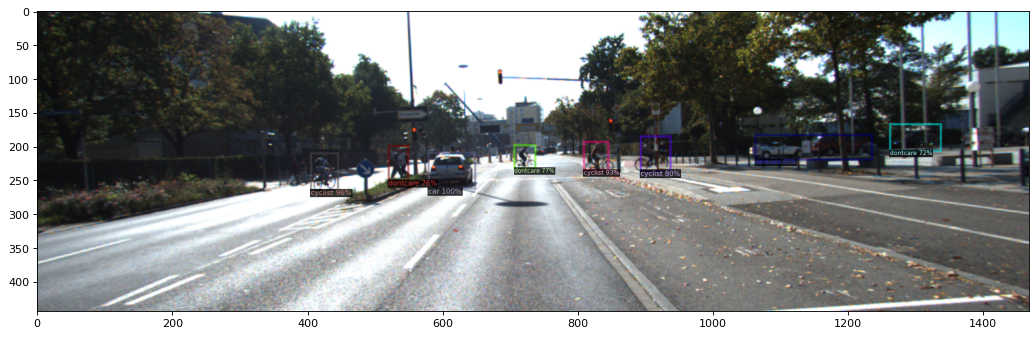

In [4]:
# Visualize
!(cd detectron2-ResNeSt/ && python3 tools/train_kitti.py \
  --config-file configs/kitti/kitti-faster-rcnn-resnest-50.yaml MODEL.WEIGHTS ../resnest_50.pth)


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
img=mpimg.imread('detectron2-ResNeSt/prediction.png')
imgplot = plt.imshow(img)
plt.show()